# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Watermark" data-toc-modified-id="Watermark-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Watermark</a></div><div class="lev1 toc-item"><a href="#Imports-and-Setups" data-toc-modified-id="Imports-and-Setups-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports and Setups</a></div><div class="lev2 toc-item"><a href="#Autoimport-my-code" data-toc-modified-id="Autoimport-my-code-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Autoimport my code</a></div><div class="lev2 toc-item"><a href="#Plotting" data-toc-modified-id="Plotting-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Plotting</a></div><div class="lev2 toc-item"><a href="#Helper-functions" data-toc-modified-id="Helper-functions-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Helper functions</a></div><div class="lev1 toc-item"><a href="#Xist-similarity" data-toc-modified-id="Xist-similarity-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Xist similarity</a></div><div class="lev2 toc-item"><a href="#Tieback-to-correlations" data-toc-modified-id="Tieback-to-correlations-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Tieback to correlations</a></div><div class="lev1 toc-item"><a href="#Using-meta-transcripts" data-toc-modified-id="Using-meta-transcripts-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Using meta-transcripts</a></div><div class="lev2 toc-item"><a href="#Expressed-counts" data-toc-modified-id="Expressed-counts-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Expressed counts</a></div><div class="lev1 toc-item"><a href="#Repeat-with-mean" data-toc-modified-id="Repeat-with-mean-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Repeat with mean</a></div><div class="lev1 toc-item"><a href="#Communities" data-toc-modified-id="Communities-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Communities</a></div><div class="lev2 toc-item"><a href="#Trying-louvain" data-toc-modified-id="Trying-louvain-61"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Trying louvain</a></div><div class="lev1 toc-item"><a href="#Reviews" data-toc-modified-id="Reviews-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Reviews</a></div><div class="lev2 toc-item"><a href="#Reviews" data-toc-modified-id="Reviews-71"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Reviews</a></div><div class="lev2 toc-item"><a href="#Fig.-4" data-toc-modified-id="Fig.-4-72"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Fig. 4</a></div><div class="lev3 toc-item"><a href="#No-length-normalization" data-toc-modified-id="No-length-normalization-721"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>No length normalization</a></div><div class="lev3 toc-item"><a href="#HOTTIP-likeness" data-toc-modified-id="HOTTIP-likeness-722"><span class="toc-item-num">7.2.2&nbsp;&nbsp;</span>HOTTIP-likeness</a></div><div class="lev3 toc-item"><a href="#1-8-kmers" data-toc-modified-id="1-8-kmers-723"><span class="toc-item-num">7.2.3&nbsp;&nbsp;</span>1-8 kmers</a></div><div class="lev2 toc-item"><a href="#Fig-3" data-toc-modified-id="Fig-3-73"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Fig 3</a></div><div class="lev3 toc-item"><a href="#Proteins-with-kmers" data-toc-modified-id="Proteins-with-kmers-731"><span class="toc-item-num">7.3.1&nbsp;&nbsp;</span>Proteins with kmers</a></div>

# Watermark

In [1]:
%load_ext watermark
%watermark -a 'Jessime Kirk' -nmv --packages numpy,scipy,pandas,sklearn,matplotlib,seaborn,networkx,notebook,jupyter_contrib_nbextensions

Jessime Kirk Wed Sep 06 2017 

CPython 3.6.2
IPython 6.1.0

numpy 1.13.1
scipy 0.19.1
pandas 0.20.3
sklearn 0.19.0
matplotlib 2.0.2
seaborn 0.8.0
networkx 1.11
notebook 5.0.0
jupyter_contrib_nbextensions 0.2.8

compiler   : GCC 4.4.7 20120313 (Red Hat 4.4.7-1)
system     : Linux
release    : 4.10.0-33-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


# Imports and Setups

In [5]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from tqdm import tqdm, trange, tqdm_notebook, tnrange

from scipy import sparse
from scipy.stats import mode
from scipy.stats import pearsonr
from scipy.stats import ks_2samp

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import precision_recall_fscore_support

from time import sleep

from multiprocessing import Pool

## Autoimport my code

In [6]:
pwd

'/home/jessime/Code/kmers3/Notebooks'

In [7]:
cd ..

/home/jessime/Code/kmers3


In [8]:
%load_ext autoreload

In [9]:
autoreload 2

## Plotting

In [10]:
%matplotlib inline
plt.style.use("seaborn-whitegrid")
plt.rcParams['figure.figsize'] = [9.0, 6.0]
plt.rcParams['axes.titlesize'] = 26
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22
plt.rcParams['legend.fontsize'] = 22
#plt.rcParams['font.family'] = 'sans-serif'
#plt.rcParams['font.sans-serif'] = 'Helvetica'
colors = [i['color'] for i in plt.rcParams['axes.prop_cycle']]

## Helper functions

# Xist similarity

Just got back from Egypt and have to jump in to the tricky business of finding Xist similarties for all of my "meta-transcripts" in the ENCODE RNA-seq data. I was having some difficulty keeping track of names before I left, so I'm going to have to be careful moving forward to make sure I'm keeping track of everything correctly. Here's the relevant email that I sent Mauro just before leaving that summarizes where I was at and what I was thinking:

> Hey Mauro,
>  
> I have a question about what we talked about yesterday. You advised that I just use the -01 isoform to represent XIST-likeness for the spliced transcripts. But I might not have expressed my question very clearly, so I just wanted to double check to make sure we're on the same page. So, here's what I've done so far:
>  
> * Aligned 140 rnaseq experiments to the human genome
> * Quantified transcript abundance using salmon by passing the full GENCODE annotation, plus any missing unspliced isoforms doped in. 
> * Normalized the abundances using DESeq2's VarienceStablizingTransform function
>   * (here's the important part) On this step, I grouped all the spliced isoforms for a gene together, so that each gene has, at most, two "transcripts". That means I have an unspliced abundance measurement represented by a single sequence, but a spliced abundance that is potentially representative of multiple isoform sequences.
Looked for correlations between a potential repressor (on the transcript feature level) and a potential target (on the gene feature level) 
>  
> Now I want to know the Xist likeness of all the potential repressors. This is fine for the "transcripts" that have a single sequence, but could be more complicated for the spliced "transcripts" that have been grouped together by DESeq2. Just using the -01 isoform is an option, but I don't know how well that single kmer profile will represent all the kmer profiles for a given set of spliced isoforms. Two other options are to either average all the spliced isoforms, or perform a weighted average based on the expression level of each spliced transcript.
>  
> If the -01 isoform isn't that different from the others, or if we care more about that kmer profile than the others, then we should just go with that. But the way I'm thinking about it right now, I think it make sense to average the kmer profiles across the isoforms. If they are all pretty much the same, then the averaging doesn't matter. But if they're different, then we'll be able to capture a more complete picture of what kmers are actually expressed. 
>  
> Curious to know what you think about this!
>  
> Cheers

So here's what I need to do right now:

1. Make tx2tx which is a fake tx2gene file for DESeq2
2. Rerun the VST
3. Find the median expression for each transcript
4. Calculate the weight for each transcript
  1. Add meta-transcript labels
  2. Groupby then sum
  3. transcript / sum
5. Find Xist similarity of all transcript (done?)
6. Use np.average to find weighted average of similarity.

In [10]:
tx2gene = '/home/jessime/Research/v26_full_unspliced_tx2gene.csv'
tx2gene = pd.read_csv(tx2gene)
tx2gene.head()

TXNAME      GENEID
0         UNSPLICED0  DDX11L1-un
1  ENST00000456328.2     DDX11L1
2  ENST00000450305.2     DDX11L1
3         UNSPLICED1   WASH7P-un
4  ENST00000488147.1      WASH7P

In [11]:
tx2tx = tx2gene.copy()
tx2tx['GENEID'] = tx2tx['TXNAME'].values
tx2tx.head()

TXNAME             GENEID
0         UNSPLICED0         UNSPLICED0
1  ENST00000456328.2  ENST00000456328.2
2  ENST00000450305.2  ENST00000450305.2
3         UNSPLICED1         UNSPLICED1
4  ENST00000488147.1  ENST00000488147.1

In [12]:
outfile = '/home/jessime/Research/encode_rnaseq/v26_full_unspliced_tx2tx.csv'
tx2tx.to_csv(outfile, index=None)

See September for exactly how I ran DESeq2, but this time I used `deseq2_encode_rnaseq.r`, which just changed the filenames. The file it produces that I want is `norm_counts_tx2tx.csv` which is pretty large. I'm only storing it long enough to get the median values.

In [13]:
df = '/home/jessime/Research/encode_rnaseq/norm_counts_tx2tx.csv'
df = pd.read_csv(df, index_col=0)
print(df.shape)
df.head()

(234537, 140)


1          2          3          4          5  \
ENST00000000233.9   11.317750  11.605456  11.500527  12.353285  11.457397   
ENST00000000412.7    0.367240   0.367240   0.367240   0.367240   0.367240   
ENST00000000442.10   9.915468   9.342989   9.684775  12.255052   9.333935   
ENST00000001008.5   11.529354  12.173481  12.063530  13.011758  11.534420   
ENST00000001146.6    0.367240   5.192912   2.839822   0.367240   0.367240   

                            6          7          8          9         10  \
ENST00000000233.9   11.504684  11.802709  11.585402  12.022032  12.364253   
ENST00000000412.7    0.367240   0.367240   0.367240   0.367240   0.367240   
ENST00000000442.10  10.373721  10.314899  10.735868  11.440754  11.751797   
ENST00000001008.5   12.928676  12.492415  13.445066  12.479932  11.750525   
ENST00000001146.6    5.361590   3.967767   0.367240   0.367240   0.367240   

                      ...            131        132        133        134  \
ENST00000000233.9     ...      12.708683  11.798402  10.715171  13.392025   
ENST00000000412.7     ...       0.367240   0.367240   0.367240   0.367240   
ENST00000000442.10    ...       9.925586  10.416501   8.688568  11.931119   
ENST00000001008.5     ...      13.780900  11.579039   9.781797  13.278255   
ENST00000001146.6     ...       0.367240   4.606178   0.367240   0.367240   

                          135        136        137        138        139  \
ENST00000000233.9   13.935781  11.342049  12.409549  13.592285  13.257161   
ENST00000000412.7    0.367240   0.367240   0.367240   0.367240  10.033731   
ENST00000000442.10  11.237248   9.151607  11.445563  12.281960  12.856214   
ENST00000001008.5   14.914470  13.478444  12.334435  13.685768  14.515728   
ENST00000001146.6    0.367240   0.367240   0.367240   0.367240   0.367240   

                          140  
ENST00000000233.9   10.969083  
ENST00000000412.7    0.367240  
ENST00000000442.10   9.970936  
ENST00000001008.5   12.349573  
ENST00000001146.6    0.367240  

[5 rows x 140 columns]

In [15]:
df_medians = df.median(1)
df_medians.shape

(234537,)

In [72]:
df_medians2 = pd.DataFrame(df_medians)
df_medians2 = df_medians2.reset_index()
df_medians2.columns = ['TXNAME', 'median']
df_medians2.head()

TXNAME     median
0   ENST00000000233.9  11.914157
1   ENST00000000412.7   0.367240
2  ENST00000000442.10  10.148918
3   ENST00000001008.5  12.318110
4   ENST00000001146.6   0.367240

In [73]:
outfile = '/home/jessime/Research/encode_rnaseq/tx2tx_medians.csv'
df_medians2.to_csv(outfile)

I've got the medians, now I have to get the meta transcripts and calculate the weights.

In [20]:
tx2gene = '/home/jessime/Research/v26_full_unspliced_tx2gene.csv'
tx2gene = pd.read_csv(tx2gene)
tx2gene.head()

TXNAME      GENEID
0         UNSPLICED0  DDX11L1-un
1  ENST00000456328.2     DDX11L1
2  ENST00000450305.2     DDX11L1
3         UNSPLICED1   WASH7P-un
4  ENST00000488147.1      WASH7P

gunna flip this name around

In [171]:
medians_df = tx2gene.merge(df_medians2, on='TXNAME')
print(medians_df.shape)
medians_df['median'][medians_df['median'] == 0.36724019517067996] = 0
medians_df.head()

(234537, 3)


/home/jessime/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


TXNAME      GENEID     median
0         UNSPLICED0  DDX11L1-un   2.382679
1  ENST00000456328.2     DDX11L1   0.000000
2  ENST00000450305.2     DDX11L1   0.000000
3         UNSPLICED1   WASH7P-un  10.314017
4  ENST00000488147.1      WASH7P   8.181413

In [177]:
len(medians_df[medians_df['median'] == 0])

121081

In [172]:
totals = medians_df.groupby('GENEID').sum()
totals = totals.reset_index()
totals = totals.rename(columns={'median':'total'})
print(totals.shape)
totals.head()

(93228, 2)


GENEID  total
0   5S_rRNA.1    0.0
1  5S_rRNA.11    0.0
2  5S_rRNA.12    0.0
3  5S_rRNA.13    0.0
4  5S_rRNA.14    0.0

In [176]:
weights_df = medians_df.merge(totals, on='GENEID').copy()
weights_df['weight'] = weights_df['median'] / weights_df['total']
print(weights_df.shape)
weights_df.head()

(234537, 5)


TXNAME      GENEID     median      total  weight
0         UNSPLICED0  DDX11L1-un   2.382679   2.382679     1.0
1  ENST00000456328.2     DDX11L1   0.000000   0.000000     NaN
2  ENST00000450305.2     DDX11L1   0.000000   0.000000     NaN
3         UNSPLICED1   WASH7P-un  10.314017  10.314017     1.0
4  ENST00000488147.1      WASH7P   8.181413   8.181413     1.0

In [178]:
weights_df.to_csv('/home/jessime/Research/encode_rnaseq/expression_weights.csv')

Solid. I've got my weights. That means I'm deleting `norm_counts_tx2tx.csv`. Next up is getting the meta-transcript Xist-likeness. But of course I've got common names in the Xist file I've saved.

In [179]:
xist_r = '/home/jessime/Research/v26_full_unspliced_XIST_R.csv'
xist_r = pd.read_csv(xist_r)
xist_r = xist_r.rename(columns={'Unnamed: 0': 'common'})
print(xist_r.shape)
xist_r.head()

(234537, 2)


common  XIST-001
0  DDX11L1-002 -0.033451
1   DDX11L1-un -0.094976
2  DDX11L1-001 -0.111606
3   WASH7P-001 -0.145943
4    WASH7P-un -0.053444

In [180]:
id2name = '/home/jessime/Research/v26_full_unspliced_id2name.csv'
id2name = pd.read_csv(id2name, index_col=0)
id2name = id2name.rename(columns={'Unnamed: 0.1': 'TXNAME'})
print(id2name.shape)
id2name.head()

(234537, 4)


TXNAME            gene_id       common  spliced
0         UNSPLICED0  ENSG00000223972.5   DDX11L1-un    False
1  ENST00000456328.2  ENSG00000223972.5  DDX11L1-002     True
2  ENST00000450305.2  ENSG00000223972.5  DDX11L1-001     True
3         UNSPLICED1  ENSG00000227232.5    WASH7P-un    False
4  ENST00000488147.1  ENSG00000227232.5   WASH7P-001     True

Now I can merge all these piece together, then scrap what I don't need.

Also, it looks like I've found some non-unique identifiers again. This time it doesn't appear to by my fault. The common name LYNX1, for example is used for 3 different Ensemble identifiers... This is a very small portion of the cases though, and I'm inclined to just drop duplicates and move on.

In [186]:
xist_temp = weights_df.merge(id2name, on='TXNAME')
xist_temp = xist_temp.merge(xist_r, on='common')
print(xist_temp.shape)

xist_temp = xist_temp.drop_duplicates('TXNAME')
xist_temp['XIST_R'] = xist_temp['XIST-001'] * xist_temp['weight']
print(xist_temp.shape)

xist_meta = xist_temp[['GENEID', 'XIST_R']]
xist_meta = xist_meta.groupby('GENEID').sum()
print(xist_meta.shape)

xist_meta_exp = xist_meta.dropna()
print(xist_meta_exp.shape)

xist_meta_exp.head()

(235187, 9)
(234537, 10)
(93228, 1)
(45931, 1)


XIST_R
GENEID          
7SK.1  -0.056028
7SK.10  0.095787
7SK.12  0.054343
7SK.7   0.035351
A1BG   -0.100689

It seems like there's a decent chance that I'm going to want to add additional columns of data to this dataframe. So I'm going to save i under a generic name and build it out in the future if necessary.

In [182]:
xist_temp[xist_temp['common'].str.contains('XIST')]

TXNAME         GENEID    median     total  weight  \
230155     UNSPLICED34211        XIST-un  4.813413  4.813413     1.0   
230156  ENST00000434839.2           XIST  0.000000  6.274115     0.0   
230157  ENST00000421322.1           XIST  0.000000  6.274115     0.0   
230158  ENST00000417942.5           XIST  0.000000  6.274115     0.0   
230159  ENST00000416330.1           XIST  0.000000  6.274115     0.0   
230160  ENST00000429829.5           XIST  6.274115  6.274115     1.0   
230161  ENST00000635841.1           XIST  0.000000  6.274115     0.0   
230162  ENST00000433732.1           XIST  0.000000  6.274115     0.0   
230163  ENST00000602587.5           XIST  0.000000  6.274115     0.0   
230164  ENST00000445814.1           XIST  0.000000  6.274115     0.0   
230165  ENST00000602863.1           XIST  0.000000  6.274115     0.0   
230166  ENST00000602495.1           XIST  0.000000  6.274115     0.0   
230167  ENST00000619444.1  XIST_intron.1  0.000000  0.000000     NaN   

                   gene_id             common  spliced  XIST-001    XIST_R  
230155  ENSG00000229807.10            XIST-un    False  0.897408  0.897408  
230156  ENSG00000229807.10           XIST-005     True  0.380032  0.000000  
230157  ENSG00000229807.10           XIST-003     True  0.200772  0.000000  
230158  ENSG00000229807.10           XIST-006     True  0.211770  0.000000  
230159  ENSG00000229807.10           XIST-002     True  0.220808  0.000000  
230160  ENSG00000229807.10           XIST-001     True  1.000000  1.000000  
230161  ENSG00000229807.10           XIST-011     True  0.319832  0.000000  
230162  ENSG00000229807.10           XIST-007     True  0.260052  0.000000  
230163  ENSG00000229807.10           XIST-010     True  0.171203  0.000000  
230164  ENSG00000229807.10           XIST-004     True  0.144188  0.000000  
230165  ENSG00000229807.10           XIST-008     True  0.155298  0.000000  
230166  ENSG00000229807.10           XIST-009     True  0.167075  0.000000  
230167   ENSG00000274655.1  XIST_intron.1-201    False  0.038344       NaN

In [187]:
xist_meta_exp.sort_values('XIST_R').tail(10)

XIST_R
GENEID                 
COL4A6-un      0.580797
LINC01811-un   0.580820
ERC2-un        0.580892
C10orf11-un    0.582146
RARB-un        0.582918
ADAMTS12-un    0.584558
PDE1C-un       0.586551
ST6GALNAC3-un  0.591906
XIST-un        0.897408
XIST           1.000000

**Note: (This comment was made before dropping down to zeros)** As we can see here, we're probably dealing with some noise, since XIST-001 is the dominantly expressed transcript, and the R value should probably be higher than that. But it's high enough for what we need, I believe. 

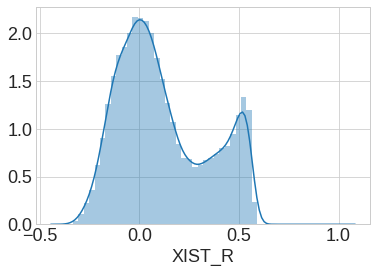

In [188]:
sns.distplot(xist_meta_exp['XIST_R']);

In [189]:
outfile = '/home/jessime/Research/encode_rnaseq/meta_tx.csv'
xist_meta.to_csv(outfile)
outfile = '/home/jessime/Research/encode_rnaseq/meta_tx_exp.csv'
xist_meta_exp.to_csv(outfile)

## Tieback to correlations

Now we can merge this into all the interactions and look for any patterns. For example are the potential repressors more likely to be Xist like? That's a difficult question, but one we would like to answer.  

In [190]:
r_vals = '/home/jessime/Research/encode_rnaseq/r_vals.csv'
r_vals = pd.read_csv(r_vals, index_col=0)
print(r_vals.shape)
r_vals.tail()

(929934, 4)


repressor    target   r_value     slope
929929   ZZZ3-un  ACTG1P21 -0.282263 -0.212451
929930   ZZZ3-un       AK5  0.274163  1.517127
929931   ZZZ3-un      ZZZ3  0.872010  0.997967
929932   ZZZ3-un  RNA5SP21 -0.051824 -0.029638
929933   ZZZ3-un     USP33  0.206113  0.177626

In [191]:
r_vals = r_vals.merge(xist_meta, left_on='repressor', right_index=True)
print(r_vals.shape)
r_vals.tail()

(929934, 5)


repressor    target   r_value     slope    XIST_R
929929   ZZZ3-un  ACTG1P21 -0.282263 -0.212451  0.508505
929930   ZZZ3-un       AK5  0.274163  1.517127  0.508505
929931   ZZZ3-un      ZZZ3  0.872010  0.997967  0.508505
929932   ZZZ3-un  RNA5SP21 -0.051824 -0.029638  0.508505
929933   ZZZ3-un     USP33  0.206113  0.177626  0.508505

I don't think I'm going to save this merge, which is just going to add a lot of bloat.

In [192]:
r_vals_best = r_vals[r_vals['r_value'] < -.5]
r_vals_best = r_vals_best[r_vals_best['slope'] < -.5]
r_vals_best = r_vals_best.dropna()
r_vals_best = r_vals_best.sort_values('r_value')
print(r_vals_best.shape)
r_vals_best.head()

(1191, 5)


repressor    target   r_value     slope    XIST_R
198888        DOK4     CCL17 -0.860157 -1.993386 -0.139614
272650  HIST2H2AA3    FCGR1A -0.860011 -0.711420 -0.125448
106206    CCDC102A     CCL17 -0.844373 -2.132550 -0.214270
110054    CCL17-un  CCDC102A -0.832259 -1.361951 -0.090179
104318  CASKIN2-un      GRB2 -0.821149 -0.583913 -0.231476

So where do the Xist-likeness levels of these potential repressors fall relative to all RNAs?

In [193]:
repressor_r = xist_meta[xist_meta.index.isin(r_vals_best['repressor'])]['XIST_R']

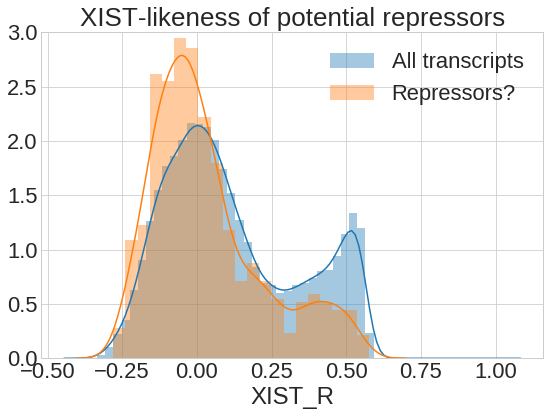

In [224]:
sns.distplot(xist_meta_exp['XIST_R'], label='All transcripts')
sns.distplot(repressor_r, label='Repressors?')
plt.title('XIST-likeness of potential repressors')
plt.ylim((0, 3))
plt.legend();

So that's basically the opposite of the trend that I'm looking for.

There are many other ways to address this question, but before moving on, it's worth taking a step back and verifying that using meta-transcripts makes sense.

# Using meta-transcripts

Before getting into this, one thing worth knowing is how many different transcripts each meta-transcript contains:

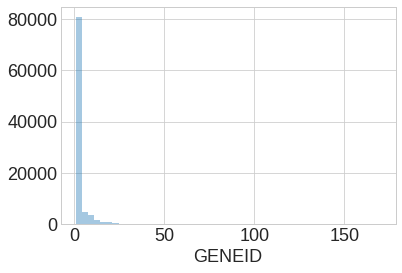

In [205]:
tx_count = weights_df['GENEID'].value_counts()
sns.distplot(tx_count, kde=False);

Almost all of them only have one.

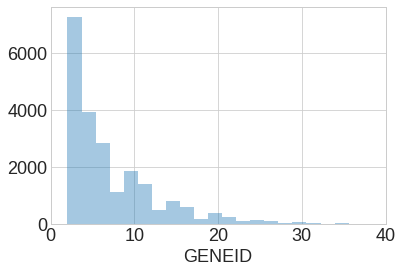

In [212]:
sns.distplot(tx_count[tx_count != 1], bins=100, kde=False)
plt.xlim((0, 40))
plt.show()

In [197]:
top_weights_df = weights_df.groupby('GENEID').max()

In [201]:
print(top_weights_df.shape)
top_weights_df = top_weights_df.dropna()
print(top_weights_df.shape)
top_weights_df.head()

(93228, 4)
(45931, 4)


TXNAME     median      total    weight
GENEID                                                   
7SK.1   ENST00000365328.1  10.814277  10.814277  1.000000
7SK.10  ENST00000621414.1   2.721164   2.721164  1.000000
7SK.12  ENST00000612820.1   1.664093   1.664093  1.000000
7SK.7   ENST00000603504.1   1.793036   1.793036  1.000000
A1BG    ENST00000600966.1   7.251206   9.509566  0.762517

(12922, 4)


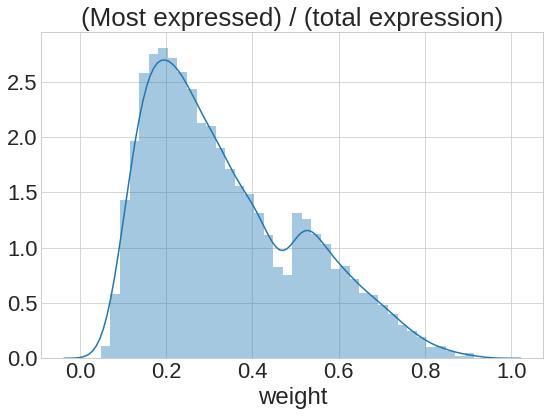

In [221]:
not_one_weights = top_weights_df[top_weights_df['weight'] != 1]
print(not_one_weights.shape)
plt.title('(Most expressed) / (total expression)')
sns.distplot(not_one_weights['weight']);

In [216]:
print(not_one_weights['weight'].mean())
print(not_one_weights['weight'].median())

0.3395713307718377
0.29752998255657687


In [214]:
len(top_weights_df[top_weights_df['weight'] == 1])

33009

In [215]:
len(top_weights_df)

45931

**Take away:** 

* There are 93k meta-transcripts.
* 46k are expressed.
* Most, 33k, have only one transcript expressed
* Only 13k have multiple transcripts expressed
* In the multi group, the top transcript is likely to make up < 1/3 of the total expression.
* We should probably continue on with meta-transcripts

The last point isn't a final decision so much as a conclusion just from the data above. A problem here is that I'm taking medians. I don't know that I want to say that these transcript don't exist just because they aren't expressed in a majority of cells. I'm going to get some counts to how often transcripts are expressed.

## Expressed counts

I did this on longleaf:

```python
df = pd.read_csv('norm_counts_tx2tx.csv', index_col=0)
z = (df != 0.36724019517067996).astype(int).sum(axis=1)
z.to_csv('expressed_count.csv')
```

In [227]:
expressed_count = '/home/jessime/Research/encode_rnaseq/expressed_count.csv'
expressed_count = pd.read_csv(expressed_count, index_col=0, header=None)
expressed_count.columns = ['count']
expressed_count.head()

count
0                        
ENST00000000233.9     140
ENST00000000412.7       9
ENST00000000442.10    128
ENST00000001008.5     140
ENST00000001146.6      38

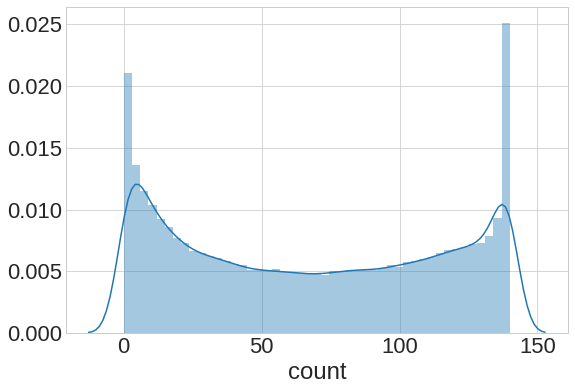

In [229]:
sns.distplot(expressed_count['count']);

# Repeat with mean

I'm basically going to redo everything in the first half of this notebook. It doesn't make any sense to use median values here. I'm going to have to find the means of each of the rows in the original matrix. I'll replace the 0's in that dataframe before doing anything else.

In [7]:
df = '/home/jessime/Research/encode_rnaseq/norm_counts_tx2tx.csv'
df = pd.read_csv(df, index_col=0)
df[df == 0.36724019517067996] = 0
print(df.shape)
df.head()

(234537, 140)


1          2          3          4          5  \
ENST00000000233.9   11.317750  11.605456  11.500527  12.353285  11.457397   
ENST00000000412.7    0.000000   0.000000   0.000000   0.000000   0.000000   
ENST00000000442.10   9.915468   9.342989   9.684775  12.255052   9.333935   
ENST00000001008.5   11.529354  12.173481  12.063530  13.011758  11.534420   
ENST00000001146.6    0.000000   5.192912   2.839822   0.000000   0.000000   

                            6          7          8          9         10  \
ENST00000000233.9   11.504684  11.802709  11.585402  12.022032  12.364253   
ENST00000000412.7    0.000000   0.000000   0.000000   0.000000   0.000000   
ENST00000000442.10  10.373721  10.314899  10.735868  11.440754  11.751797   
ENST00000001008.5   12.928676  12.492415  13.445066  12.479932  11.750525   
ENST00000001146.6    5.361590   3.967767   0.000000   0.000000   0.000000   

                      ...            131        132        133        134  \
ENST00000000233.9     ...      12.708683  11.798402  10.715171  13.392025   
ENST00000000412.7     ...       0.000000   0.000000   0.000000   0.000000   
ENST00000000442.10    ...       9.925586  10.416501   8.688568  11.931119   
ENST00000001008.5     ...      13.780900  11.579039   9.781797  13.278255   
ENST00000001146.6     ...       0.000000   4.606178   0.000000   0.000000   

                          135        136        137        138        139  \
ENST00000000233.9   13.935781  11.342049  12.409549  13.592285  13.257161   
ENST00000000412.7    0.000000   0.000000   0.000000   0.000000  10.033731   
ENST00000000442.10  11.237248   9.151607  11.445563  12.281960  12.856214   
ENST00000001008.5   14.914470  13.478444  12.334435  13.685768  14.515728   
ENST00000001146.6    0.000000   0.000000   0.000000   0.000000   0.000000   

                          140  
ENST00000000233.9   10.969083  
ENST00000000412.7    0.000000  
ENST00000000442.10   9.970936  
ENST00000001008.5   12.349573  
ENST00000001146.6    0.000000  

[5 rows x 140 columns]

In [15]:
means_df = df.mean(1)
means_df = pd.DataFrame(means_df)
means_df = means_df.reset_index()
means_df.columns = ['TXNAME', 'mean']

tx2gene = '/home/jessime/Research/v26_full_unspliced_tx2gene.csv'
tx2gene = pd.read_csv(tx2gene)
means_df = tx2gene.merge(means_df, on='TXNAME')

totals = means_df.groupby('GENEID').sum()
totals = totals.reset_index()
totals = totals.rename(columns={'mean':'total'})

weights_df = means_df.merge(totals, on='GENEID').copy()
weights_df['weight'] = weights_df['mean'] / weights_df['total']

xist_r = '/home/jessime/Research/v26_full_unspliced_XIST_R.csv'
xist_r = pd.read_csv(xist_r)
xist_r = xist_r.rename(columns={'Unnamed: 0': 'common'})

id2name = '/home/jessime/Research/v26_full_unspliced_id2name.csv'
id2name = pd.read_csv(id2name, index_col=0)
id2name = id2name.rename(columns={'Unnamed: 0.1': 'TXNAME'})

xist_temp = weights_df.merge(id2name, on='TXNAME')
xist_temp = xist_temp.merge(xist_r, on='common')
xist_temp = xist_temp.drop_duplicates('TXNAME')
xist_temp['XIST_R'] = xist_temp['XIST-001'] * xist_temp['weight']
print(xist_temp.shape)
xist_temp = xist_temp.dropna()
print(xist_temp.shape)
print()

xist_meta = xist_temp[['GENEID', 'XIST_R']]
xist_meta = xist_meta.groupby('GENEID').sum()
print(xist_meta.shape)

xist_meta.head()

(234537, 10)
(230456, 10)

(89185, 1)


XIST_R
GENEID              
5S_rRNA.1   0.008531
5S_rRNA.11  0.066040
5S_rRNA.13  0.027783
5S_rRNA.15  0.062099
5S_rRNA.16 -0.043966

In [13]:
xist_temp[xist_temp['common'].str.contains('XIST')]

TXNAME         GENEID      mean      total    weight  \
230155     UNSPLICED34211        XIST-un  6.062888   6.062888  1.000000   
230156  ENST00000434839.2           XIST  3.481290  23.836960  0.146046   
230157  ENST00000421322.1           XIST  0.625150  23.836960  0.026226   
230158  ENST00000417942.5           XIST  0.720157  23.836960  0.030212   
230159  ENST00000416330.1           XIST  2.203660  23.836960  0.092447   
230160  ENST00000429829.5           XIST  7.120004  23.836960  0.298696   
230161  ENST00000635841.1           XIST  1.805555  23.836960  0.075746   
230162  ENST00000433732.1           XIST  0.894639  23.836960  0.037532   
230163  ENST00000602587.5           XIST  0.189409  23.836960  0.007946   
230164  ENST00000445814.1           XIST  3.174709  23.836960  0.133184   
230165  ENST00000602863.1           XIST  1.904147  23.836960  0.079882   
230166  ENST00000602495.1           XIST  1.718239  23.836960  0.072083   
230167  ENST00000619444.1  XIST_intron.1  0.119998   0.119998  1.000000   

                   gene_id             common  spliced  XIST-001    XIST_R  
230155  ENSG00000229807.10            XIST-un    False  0.897408  0.897408  
230156  ENSG00000229807.10           XIST-005     True  0.380032  0.055502  
230157  ENSG00000229807.10           XIST-003     True  0.200772  0.005265  
230158  ENSG00000229807.10           XIST-006     True  0.211770  0.006398  
230159  ENSG00000229807.10           XIST-002     True  0.220808  0.020413  
230160  ENSG00000229807.10           XIST-001     True  1.000000  0.298696  
230161  ENSG00000229807.10           XIST-011     True  0.319832  0.024226  
230162  ENSG00000229807.10           XIST-007     True  0.260052  0.009760  
230163  ENSG00000229807.10           XIST-010     True  0.171203  0.001360  
230164  ENSG00000229807.10           XIST-004     True  0.144188  0.019204  
230165  ENSG00000229807.10           XIST-008     True  0.155298  0.012406  
230166  ENSG00000229807.10           XIST-009     True  0.167075  0.012043  
230167   ENSG00000274655.1  XIST_intron.1-201    False  0.038344  0.038344

Still not encouraging...

Let's see what the graph looks like.

In [14]:
r_vals = '/home/jessime/Research/encode_rnaseq/r_vals.csv'
r_vals = pd.read_csv(r_vals, index_col=0)
r_vals = r_vals.merge(xist_meta, left_on='repressor', right_index=True)

r_vals_best = r_vals[r_vals['r_value'] < -.5]
r_vals_best = r_vals_best[r_vals_best['slope'] < -.5]
r_vals_best = r_vals_best.dropna()
r_vals_best = r_vals_best.sort_values('r_value')

repressor_r = xist_meta[xist_meta.index.isin(r_vals_best['repressor'])]['XIST_R']

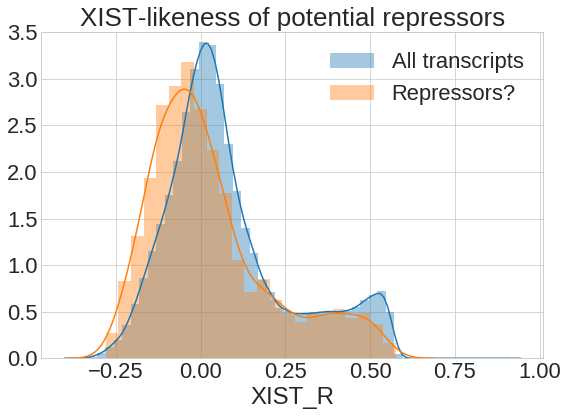

In [15]:
sns.distplot(xist_meta['XIST_R'].dropna(), label='All transcripts')
sns.distplot(repressor_r, label='Repressors?')
plt.title('XIST-likeness of potential repressors')
plt.ylim((0, 3.5))
plt.legend();

Huh. Well I guess in the end, it doesn't really matter if you use the mean or the median.

On a different subject, how many 0s are there in the original dataframe?

In [244]:
zeros = (df.values == 0).sum()
print(zeros)
print(zeros/df.values.size)

16915475
0.515163157321


It's half 0s. Good to know. And how many 0s are there in the meta-transcripts. That is, how many transcripts are just never expressed?

In [16]:
xist_meta.dropna().shape

(89185, 1)

In [9]:
!mv /home/jessime/Research/encode_rnaseq/expression_weights.csv /home/jessime/Research/encode_rnaseq/exp_median_weights.csv

In [11]:
outfile = '/home/jessime/Research/encode_rnaseq/exp_mean_weights.csv'
weights_df.to_csv(outfile)

I'm starting to think about making communities. Do I want to:

1. Include all meta-transcripts?
2. Just those that are expressed at all?
3. Make some other threshold?

My initial thought is to include those that are expressed at all. If I don't have any detection in 140 RNAseq experiments, I don't know how confident I am that this meta-transcript is worth considering.

# Communities

This is going to be a bit of an undertaking. A high-level overview is:

1. Get kmer counts of all transcripts
2. Use weights to get kmer counts of meta-transcripts
3. Hierarchically cluster these counts
4. Toy around with louvain

Getting the clusters should be pretty interesting. Comparing it to the lncRNA clusters should be fun.

In [8]:
%aimport kmer_counts

In [9]:
infasta = '/home/jessime/Research/v26_full_unspliced.fa'
outfile = '/home/jessime/Research/6mers_v26_full_unspliced.csv'


counter = kmer_counts.BasicCounter(infasta)
counter.get_counts()

A Jupyter Widget

Shoot, I actually don't need that file as a CSV. I need to weight and groupby first. So I can delete that file.

I don't know why, but I don't appear to have a list of names ordered the sames as my fasta file. So I'll have to grab that first.

In [22]:
infasta = '/home/jessime/Research/v26_full_unspliced.fa'
with open(infasta) as infasta:
    headers = [l for l in infasta.readlines() if l[0] == '>']
    
headers = [h.split()[0].strip('>') for h in headers]
print(len(headers))
headers[-5:]

234537


['ENST00000496301.6_PAR_Y',
 'ENST00000483286.6_PAR_Y',
 'ENST00000464205.6_PAR_Y',
 'ENST00000507418.6_PAR_Y',
 'UNSPLICED35212']

In [27]:
weights_sorted = weights_df.copy()
weights_sorted = weights_sorted.set_index('TXNAME')
weights_sorted = weights_sorted.loc[headers]
weights_sorted.head()

GENEID       mean      total   weight
TXNAME                                                      
ENST00000456328.2     DDX11L1   2.218311   2.275285  0.97496
UNSPLICED0         DDX11L1-un   2.431283   2.431283  1.00000
ENST00000450305.2     DDX11L1   0.056974   2.275285  0.02504
ENST00000488147.1      WASH7P   7.691717   7.691717  1.00000
UNSPLICED1          WASH7P-un  10.227320  10.227320  1.00000

Let's do a couple of small arrays just to make sure that my code will do what it should.

In [33]:
test_counts = pd.DataFrame(np.random.randint(0, 9, (4, 6)))
test_counts

0  1  2  3  4  5
0  0  6  1  7  8  0
1  5  7  3  3  1  8
2  0  5  3  4  8  1
3  1  7  8  2  2  2

In [36]:
test_weights = np.array([.1, .2, .3, .4])
(test_counts.T * test_weights).T


0    1    2    3    4    5
0  0.0  0.6  0.1  0.7  0.8  0.0
1  1.0  1.4  0.6  0.6  0.2  1.6
2  0.0  1.5  0.9  1.2  2.4  0.3
3  0.4  2.8  3.2  0.8  0.8  0.8

In [37]:
counts_df = pd.DataFrame(data=counter.counts, index=weights_sorted.index)
counts_df.head()

0         1         2         3         4         5     \
TXNAME                                                                          
ENST00000456328.2 -0.456185 -0.611794 -0.647837 -0.533893 -0.609858 -0.533417   
UNSPLICED0        -0.456185 -0.611794 -0.647837 -0.533893 -0.609858 -0.533417   
ENST00000450305.2 -0.456185 -0.611794 -0.647837 -0.533893 -0.609858 -0.533417   
ENST00000488147.1 -0.456185 -0.611794 -0.647837 -0.533893 -0.609858 -0.533417   
UNSPLICED1        -0.197718 -0.292206 -0.362410 -0.210210 -0.258371 -0.374182   

                       6         7         8         9       ...         4086  \
TXNAME                                                       ...                
ENST00000456328.2 -0.497321  0.299634 -0.606543 -0.621247    ...     1.104480   
UNSPLICED0        -0.497321  0.019377 -0.606543 -0.621247    ...     0.615908   
ENST00000450305.2 -0.497321 -0.505944 -0.606543 -0.621247    ...    -0.299888   
ENST00000488147.1 -0.497321 -0.505944 -0.606543 -0.621247    ...    -0.299888   
UNSPLICED1        -0.327854 -0.241915 -0.153690 -0.286153    ...     0.006967   

                       4087      4088      4089      4090      4091      4092  \
TXNAME                                                                          
ENST00000456328.2 -0.376410  0.946320  1.253321 -0.446041  0.209255  0.797378   
UNSPLICED0        -0.376410  2.164346  0.635941  0.130965  0.425609  1.202419   
ENST00000450305.2 -0.376410 -0.327345 -0.521298 -0.446041 -0.501942  1.211349   
ENST00000488147.1  0.623251 -0.327345  2.380793  0.639209  1.242622  2.731972   
UNSPLICED1        -0.198321  0.646693  0.771221  0.230639  0.352741  0.338696   

                       4093      4094      4095  
TXNAME                                           
ENST00000456328.2 -0.361245  0.384603 -0.320377  
UNSPLICED0        -0.361245  0.094650  0.194415  
ENST00000450305.2 -0.361245 -0.448847 -0.320377  
ENST00000488147.1  0.854898  3.640054 -0.320377  
UNSPLICED1        -0.252917  0.734864 -0.147886  

[5 rows x 4096 columns]

In [38]:
counts_df = (counts_df.T * weights_sorted['weight']).T
counts_df.head()

0         1         2         3         4         5     \
TXNAME                                                                          
ENST00000456328.2 -0.444762 -0.596474 -0.631615 -0.520524 -0.594587 -0.520060   
UNSPLICED0        -0.456185 -0.611794 -0.647837 -0.533893 -0.609858 -0.533417   
ENST00000450305.2 -0.011423 -0.015320 -0.016222 -0.013369 -0.015271 -0.013357   
ENST00000488147.1 -0.456185 -0.611794 -0.647837 -0.533893 -0.609858 -0.533417   
UNSPLICED1        -0.197718 -0.292206 -0.362410 -0.210210 -0.258371 -0.374182   

                       6         7         8         9       ...         4086  \
TXNAME                                                       ...                
ENST00000456328.2 -0.484868  0.292131 -0.591355 -0.605690    ...     1.076823   
UNSPLICED0        -0.497321  0.019377 -0.606543 -0.621247    ...     0.615908   
ENST00000450305.2 -0.012453 -0.012669 -0.015188 -0.015556    ...    -0.007509   
ENST00000488147.1 -0.497321 -0.505944 -0.606543 -0.621247    ...    -0.299888   
UNSPLICED1        -0.327854 -0.241915 -0.153690 -0.286153    ...     0.006967   

                       4087      4088      4089      4090      4091      4092  \
TXNAME                                                                          
ENST00000456328.2 -0.366985  0.922624  1.221937 -0.434872  0.204015  0.777411   
UNSPLICED0        -0.376410  2.164346  0.635941  0.130965  0.425609  1.202419   
ENST00000450305.2 -0.009425 -0.008197 -0.013054 -0.011169 -0.012569  0.030333   
ENST00000488147.1  0.623251 -0.327345  2.380793  0.639209  1.242622  2.731972   
UNSPLICED1        -0.198321  0.646693  0.771221  0.230639  0.352741  0.338696   

                       4093      4094      4095  
TXNAME                                           
ENST00000456328.2 -0.352199  0.374972 -0.312355  
UNSPLICED0        -0.361245  0.094650  0.194415  
ENST00000450305.2 -0.009046 -0.011239 -0.008022  
ENST00000488147.1  0.854898  3.640054 -0.320377  
UNSPLICED1        -0.252917  0.734864 -0.147886  

[5 rows x 4096 columns]

In [39]:
counts_df = counts_df.join(weights_sorted['GENEID'])
counts_df.head()

0         1         2         3         4         5  \
TXNAME                                                                          
ENST00000456328.2 -0.444762 -0.596474 -0.631615 -0.520524 -0.594587 -0.520060   
UNSPLICED0        -0.456185 -0.611794 -0.647837 -0.533893 -0.609858 -0.533417   
ENST00000450305.2 -0.011423 -0.015320 -0.016222 -0.013369 -0.015271 -0.013357   
ENST00000488147.1 -0.456185 -0.611794 -0.647837 -0.533893 -0.609858 -0.533417   
UNSPLICED1        -0.197718 -0.292206 -0.362410 -0.210210 -0.258371 -0.374182   

                          6         7         8         9     ...      \
TXNAME                                                        ...       
ENST00000456328.2 -0.484868  0.292131 -0.591355 -0.605690     ...       
UNSPLICED0        -0.497321  0.019377 -0.606543 -0.621247     ...       
ENST00000450305.2 -0.012453 -0.012669 -0.015188 -0.015556     ...       
ENST00000488147.1 -0.497321 -0.505944 -0.606543 -0.621247     ...       
UNSPLICED1        -0.327854 -0.241915 -0.153690 -0.286153     ...       

                       4087      4088      4089      4090      4091      4092  \
TXNAME                                                                          
ENST00000456328.2 -0.366985  0.922624  1.221937 -0.434872  0.204015  0.777411   
UNSPLICED0        -0.376410  2.164346  0.635941  0.130965  0.425609  1.202419   
ENST00000450305.2 -0.009425 -0.008197 -0.013054 -0.011169 -0.012569  0.030333   
ENST00000488147.1  0.623251 -0.327345  2.380793  0.639209  1.242622  2.731972   
UNSPLICED1        -0.198321  0.646693  0.771221  0.230639  0.352741  0.338696   

                       4093      4094      4095      GENEID  
TXNAME                                                       
ENST00000456328.2 -0.352199  0.374972 -0.312355     DDX11L1  
UNSPLICED0        -0.361245  0.094650  0.194415  DDX11L1-un  
ENST00000450305.2 -0.009046 -0.011239 -0.008022     DDX11L1  
ENST00000488147.1  0.854898  3.640054 -0.320377      WASH7P  
UNSPLICED1        -0.252917  0.734864 -0.147886   WASH7P-un  

[5 rows x 4097 columns]

Those were really memory intensive, so I'm going to save and restart here.

In [40]:
counts_df.to_csv('/home/jessime/Research/encode_rnaseq/6mers_v26_tx_weighted.csv')

Whoa, I really missed the mark on how large that Dataframe was/is. It's almost 20GB on disk. I'm going to restart, load it back in, groupby, save the new one, delete the old one.

In [8]:
counts_df = '/home/jessime/Research/encode_rnaseq/6mers_v26_tx_weighted.csv'
counts_df = pd.read_csv(counts_df, index_col=0)

And... that didn't help at all. This matrix is just really big. I'm going to do the next bit on longleaf.

```python
counts_df = counts_df.groupby('GENEID').sum()
counts_df = counts_df.dropna()
```

In [17]:
89185/16000

5.5740625

In [3]:
89185*4096

365301760

These matricies are causing all sorts of problems for my current heirarchical clustering pipeline. I ended up splitting the maxtrix in two and doing the top and bottom half separately. The two clusters are decently similar. I've saved them at:

* ~/Research/pics/6mers_v26_meta2.png
* ~/Research/pics/6mers_v26_meta2-2.png

There are a few interesting features of the images, but nothing too bizzare. I'm going to go ahead and start thinking about getting louvain up and running.

Before I get into that though, I want to do a small amount of testing on using np.cov instead of my pearson module. First, I'll just document that I get the same answers.

In [7]:
%aimport pearson

In [45]:
mat = np.random.randint(0, 9, (6, 15))
mat

array([[1, 6, 6, 2, 1, 1, 7, 0, 2, 1, 4, 0, 1, 1, 4],
       [5, 6, 7, 4, 6, 6, 4, 3, 1, 1, 5, 7, 2, 2, 1],
       [3, 6, 3, 4, 0, 4, 5, 1, 6, 7, 6, 0, 6, 3, 5],
       [0, 4, 6, 8, 4, 4, 1, 5, 6, 1, 5, 3, 3, 5, 7],
       [4, 0, 7, 0, 5, 6, 1, 1, 6, 5, 7, 3, 0, 0, 2],
       [5, 5, 0, 4, 4, 0, 6, 5, 7, 3, 1, 2, 5, 6, 1]])

In [46]:
print(pearson.pearson(mat, mat))
print()
print(np.corrcoef(mat))

[[ 1.          0.19508777  0.41567722  0.09587615  0.01203444 -0.10983264]
 [ 0.19508777  1.         -0.50395111 -0.10022662  0.27385093 -0.42406057]
 [ 0.41567722 -0.50395111  1.         -0.04018755  0.01321214  0.07750397]
 [ 0.09587615 -0.10022662 -0.04018755  1.         -0.03786911 -0.22295417]
 [ 0.01203444  0.27385093  0.01321214 -0.03786911  1.         -0.52874211]
 [-0.10983264 -0.42406057  0.07750397 -0.22295417 -0.52874211  1.        ]]

[[ 1.          0.19508777  0.41567722  0.09587615  0.01203444 -0.10983264]
 [ 0.19508777  1.         -0.50395111 -0.10022662  0.27385093 -0.42406057]
 [ 0.41567722 -0.50395111  1.         -0.04018755  0.01321214  0.07750397]
 [ 0.09587615 -0.10022662 -0.04018755  1.         -0.03786911 -0.22295417]
 [ 0.01203444  0.27385093  0.01321214 -0.03786911  1.         -0.52874211]
 [-0.10983264 -0.42406057  0.07750397 -0.22295417 -0.52874211  1.        ]]


In [50]:
mat2 = np.random.randint(0, 9, (3, 15))

print(pearson.pearson(mat, mat2))
print()
print(np.corrcoef(mat, mat2)[:6, -3:])

[[-0.05320116  0.3172945   0.32835307]
 [ 0.31718213  0.22546079  0.29561074]
 [-0.09923469 -0.05559624 -0.27415828]
 [-0.21794744  0.14715661  0.14950416]
 [ 0.46520135  0.10208913  0.11435139]
 [-0.00630779 -0.39971656 -0.27703866]]

[[-0.05320116  0.3172945   0.32835307]
 [ 0.31718213  0.22546079  0.29561074]
 [-0.09923469 -0.05559624 -0.27415828]
 [-0.21794744  0.14715661  0.14950416]
 [ 0.46520135  0.10208913  0.11435139]
 [-0.00630779 -0.39971656 -0.27703866]]


In [20]:
mat = np.random.randint(0, 9, (10000, 10000))

In [22]:
%timeit sim = pearson.pearson(mat, mat)

27.5 s ± 756 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
%timeit sim = np.corrcoef(mat)

14.3 s ± 348 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


I'm not going to bench mark this, but it looks like the builtin not only takes half the time, but it also takes half the memory. Looks like I'm going to be using this from now on.

In [36]:
np.count_nonzero(mat)

83

## Trying louvain

I'm doing all this on longleaf, but I want to keep notes of what I'm trying and thinking.

I've made the similarty matrix, and converted it to float32. This thing is 30GB. The mean of the elements is .024 and the std is .1448. So I set a threshold at .17. This gives an 8.9% density for the matrix, which is still huge. I don't want to have to save any of this, but I haven't found a reliable way to monitor memory usage in a job. So I could get kicked, in which case I'd like to have a "checkpoint". I'm going to convert to a sparse matrix then work with that.

It looks like a sparse matrix is going to be decently useful. I can save and load it, which isn't too slow. Technically, networkx can take the sparse matrix, but it's taking forever (and a ton of memory) to convert to a Graph. I don't know if the code below is going to work but here's an example of how you can find the main connected subgraph before passing it into networkx. I'm going to give this a shot just to see if it's any quicker.

In [112]:
mat = np.random.randint(0, 9, (100, 500))
sim = np.corrcoef(mat)
sim[sim < 0.1] = 0
sim = sparse.csr_matrix(sim)
n_comp, labels = sparse.csgraph.connected_components(sim)
common = mode(labels)[0][0]
sim = sim[labels == common]
sim = sparse.csc_matrix(sim)
sim = sim[:, labels == common]
sim.shape

(45, 45)

In [113]:
sparse.csgraph.connected_components(sim)

(1, array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32))

After applying this code to the matrix, it turns out that 82362 of 89185 nodes are connected to the main subgraph. I'd probably like to have a slightly less densely connected graph. I'm going to kick up the threshold a bit and make cuts at .2 and .24, saving each of those. 

In [114]:
(.1448*1.5)+.024

0.2412

```python
from scipy import sparse
from scipy.stats import mode
sim = sparse.load_npz('v26_sim_p17.npz')
n_comp, labels = sparse.csgraph.connected_components(sim)
label_mode = mode(labels)
```

Okay, using .17 as a threshold is probably going to be pretty unreasonable with my current workflow. networkx runs out of a 128GB mem limit. I've set threshold to .35, which makes the main connected subgraph contain ~47k nodes. I'm going to see if this does any better.

```python
#!/usr/bin/env python

import networkx as nx
from scipy import sparse
import pickle

name_map = pickle.load(open('name_map.pkl', 'rb'))
sim = sparse.load_npz('v26_sim_p35_sub.npz')
graph = nx.Graph(sim)
graph = nx.relabel.relabel_nodes(graph, name_map)
nx.write_gml(graph, 'v26_sim_p35_sub.gml', stringizer=str)
```

After this checkpoint, I can try generating communities

```python
import network
infile = '/pine/scr/j/e/jessime/v26_sim_p35_sub.gml'
gm = network.GraphMaker(gmlfile=infile)
gm.membership2attribute()
gm.gmlfile = 'pine/scr/j/e/jessime/v26_sim_p35_sub_lab.gml'
gm.save()

```

In [121]:
mat = np.random.randint(0, 100, (954, 954))
mat2 = np.random.randint(0, 100, (954, 954))
mat3 = mat @ mat2

In [122]:
%timeit mat3 = mat @ mat2

574 ms ± 8.82 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Reviews

Finally got reviews back:

Dear Prof. Calabrese, 

Your Article, "Functional classification of long non-coding RNAs by kmer content" has now been seen by 3 referees, who are experts in non-coding RNA biology. You will see from their comments copied below that while they find your work of considerable potential interest, they have raised quite substantial concerns that must be thoroughly addressed. In light of these comments, we cannot accept the manuscript for publication, but would be very interested in considering a revised version that addresses these serious concerns.

Reviewer #1 says the approach is novel and conceptually compelling but he/she feels that several claims may be unsubstantiated and that further analysis is warranted. 
Reviewer #2 thinks the paper is very interesting but that the validation effort seems insufficient. He/she points out certain cases where the predictions don’t seem to make much biological sense; this point needs to be clarified. 
Reviewer #3 feels this is a potentially good candidate for publication in Nature Genetics and overall he/she appreciates the validation work. His/her main points concern the sharing of all the motifs/data as a compendium to be used by the community; this would greatly enhance the resource value of this work. 
We would not necessarily insist on further/extensive experimental validation (as per Reviewer #1’s and Reviewer #2’s comments) but we'd like to encourage you to try it, if possible. It would certainly strengthen the paper.

We hope you will find the referees' comments useful as you decide how to proceed. If you wish to submit a substantially revised manuscript, please bear in mind that we will be reluctant to approach the referees again in the absence of major revisions.

If you choose to revise your manuscript taking into account all reviewer and editor comments, please highlight all changes in the manuscript text file. At this stage we will need you to upload a copy of the manuscript in MS Word .docx or similar editable format. 

We are committed to providing a fair and constructive peer-review process. Do not hesitate to contact me if there are specific requests from the reviewers that you believe are technically impossible or unlikely to yield a meaningful outcome; I'd be happy to discuss them further.

If revising your manuscript:

* Include a “Response to referees” document detailing, point-by-point, how you addressed each referee comment. If no action was taken to address a point, you must provide a compelling argument. This response will be sent back to the referees along with the revised manuscript.

* If you have not done so already please begin to revise your manuscript so that it conforms to our Article format instructions, avaliable here. Refer also to any guidelines provided in this letter.

* Include a revised version of any required reporting checklist (available at: http://www.nature.com/authors/policies/checklist.pdf). It will be available to referees (and, potentially, statisticians) to aid in their evaluation if the manuscript goes back for peer review. A revised checklist is essential for re-review of the paper.

You may use the link below to submit your revised manuscript and related files: 

http://mts-ng.nature.com/cgi-bin/main.plex?el=A5G1CGh4A5pxa2J7A9ftdn5FMTwEg3bHbtoRN7fQtoAZ 

Note: This URL links to your confidential home page and associated information about manuscripts you may have submitted, or that you are reviewing for us. If you wish to forward this email to co-authors, please delete the link to your homepage. 

If you wish to submit a suitably revised manuscript we would hope to receive it within 6 months. If you cannot send it within this time, please let us know. We will be happy to consider your revision so long as nothing similar has been accepted for publication at Nature Genetics or published elsewhere. Should your manuscript be substantially delayed without notifying us in advance and your article is eventually published, the received date would be that of the revised, not the original, version.

Please do not hesitate to contact me if you have any questions or would like to discuss the required revisions further.

Nature Genetics is committed to improving transparency in authorship. As part of our efforts in this direction, we are now requesting that all authors identified as ‘corresponding author’ on published papers create and link their Open Researcher and Contributor Identifier (ORCID) with their account on the Manuscript Tracking System (MTS), prior to acceptance. This applies to primary research papers only. ORCID helps the scientific community achieve unambiguous attribution of all scholarly contributions. You can create and link your ORCID from the home page of the MTS by clicking on ‘Modify my Springer Nature account’. For more information please visit please visit www.springernature.com/orcid.

Thank you for the opportunity to review your work.

Sincerely, 

Tiago


Tiago Faial, PhD
Associate Editor
Nature Genetics 

## Reviews

Reviewer #1:
Remarks to the Author:
The authors have presented an interesting computational method for functional prediction of lncRNA. It uses the abundance of kmers to compare the homology of lncRNAs, which is analogous to protein function prediction based on domains. The authors partitioned the annotated human lncRNAs into 6 groups (community # 1-5 and null) based on the presence and abundance of 4096 6mer sequences. However, no further characterization of these lncRNA groups was made which may advance our understanding of lncRNAs. The observation that subsets of human lncRNA are more similar to lncRNAs in various other organisms is intriguing. It will be interesting to list the top lncRNAs which demonstrate significant homology across multiple species based on the SEEKR score. In general, this work provides a novel approach for lncRNA function prediction. While this is conceptually quite compelling. The analysis is lacking rigor and many conclusions are drawn without proper controls, etc.

Major Issues:

1. SEEKR demonstrated better performance than nhmmer and Stretcher in predicting lncRNAs that have less linear sequence similarity. However, it is less powerful to identify lncRNAs with high linear sequence similarity. SEEKR will be greatly improved by integrating the existing sequence alignment algorithms, and reporting a final "homology" score based on both traditional and kmers-based method. Otherwise, relying solely on the current SEEKR might miss lncRNAs with high linear sequence similarity. 

2. Besides the basic characterization of lncRNA from different communities, the authors should mine the data further. Interesting questions include: What are the ranges of SEEKR score among each group? Can each community be further partitioned into small communities or hierarchal clustering groups, where potential functions could be better predicted? For each community, what are the highly represented kmer motifs (k=6)? 

3. The two subcellular fractionation RNA-seq data are inadequate to support the claim that kmer content provides information about subcellular localization. The nuclear percentage of lncRNA in each community are quite sparsely distributed. In addition, the violin plots are quite similar between communities, except community #3. Therefore, it is difficult to predict the subcellular localization of a query lncRNA even when it has high kmer similarity with a lncRNA with known subcellular distribution. 

4. Synthetic lncRNA #6, which only have SEEKER score of 0.19, displayed a similar repression ability as Xsit-2kb. Can the authors observe a similar extent of repression from endogenous lncRNAs which are highly similar to Xist based the SEEKR score? Additionally, they should also perform TETRIS on lncRNA that activate transcription, to expand the application of this technique. 

5. Kmer normalization method is unclear. Please include more detail on how this is done. Figure 1B is not clear and the Methods Section is similarly lacking in explanation which makes it somewhat difficult to interpret results. What is the rationale for this method? Why perform length normalization? One power of k-mer is that it becomes agnostic to length. Is looking at repetitive elements?


6. Although the authors explained the rational for choosing 'k'=6, using k>6 increases the power of detection homology pairs as shown in Figure 1C. It will be interesting to know whether the hierarchical clustering and network community results could be further improved by using k>6. What does it mean for a pair to be “detected”? How were the other tools run? Why was this analysis limited to 161 lncRNAs? Why not also test protein coding genes?

7. The reports for Figure 2A,B are anecdotal. The authors mention “most known cis-repressive lncRNAs grouped together”. This statement is lacking rigor. Was there a pool of known cis-repressive lncRNAs generated? Did the authors then test to actually see if “most” were in the same cluster? Overall, there is rigor lacking here to provide credibility for the clusters

8. Mouse lncRNA community plot is not as good as the human lncRNA community plot (Fig2B ii). One lncRNA group identified by hierarchal clustering in Mouse did not have a corresponding community group. Could the authors try different parameters and improve the community classification. The author should also show community plot for all other organisms. 

9. The authors state, “We conclude that kmer content provides information about the subcellular localization of a lncRNA.” It is unclear how the authors are drawing this conclusion. Figure 3A is suggestive that perhaps community 3 exhibits different nuclear localization than the other communities, but this is not enough evidence to draw the claim the authors are making. The concept here is compelling, but much more rigor must be applied to draw meaningful conclusions.

10. Figure 3 B is very high level. The authors do a large regression analysis on all proteins. It is unclear why the authors do not show more specific data suggesting that their kmer method is able to detect lncRNA functions; e.g., are there specific kmer signatures associated with specific binding proteins? How is this analysis different from simply looking for binding motifs within lncRNAs? The eCLIP data can be used to generate putative binding motifs, and these motifs should be looked for within the lncRNAs. The authors should then show whether or not this kmer method is in fact better than a simple motif analysis. 

11. It is unclear how the authors generate the “communities”.

12. For the cross species analysis, the authors show that some lncRNAs are more similar to other lncRNAs in other species than lncRNAs in their own genome. While this is a compelling conclusion, it is drawn from a lack of solid data. The authors do not really present controls (negative and positive), but simply report findings based on running their tool across species. 


13. The authors suggest lncRNA are grouped in a similar way by both hierarchical clustering and network community method. It will be better if they use the overlap percentage and p-value to support that the two methods are indeed comparable. 

14. No data supporting the claimed 'significance' on page 7 "The majority of communities showed slight but significant differences in their distribution of nuclear ratios".

Minor Issues:

1. Hierarchal clustering plot legend in Figure 2 was not accurately labeled. 

2. Ref. 28 is not a valid reference.



Reviewer #2:
Remarks to the Author:
This algorithm identifies sequence similarities between lncRNAs without considering the linear arrangement of the motifs. The authors claim that this is a better method than the classical sequence alignments to find functionally similar lncRNAs. Moreover, they experimentally validate the cis-repressive activity of the predicted sequence compositions with an elegant reporter assay. 

This is a very interesting paper that makes an attempt to identify families of lncRNAs based on their sequence content. However, the lack of functional information for most lncRNAs impedes the assessment of the validity of the method. The experimental method of validation is nice, but it has several limitations, since it is only applied to test the silencing of the reporter in cis. 

Although the premise that the k-mers are involved in protein interactions is plausible, the interactions with proteins don’t exclusively determine the function of the lncRNA, since bona-fide RNA binding proteins are well known to be involved in the control of RNA stability, processing or subcellular localization. Therefore the algorithm probably fails to find functional associations beyond the similarity in sequence between the lncRNAs.

The authors should be more cautious stating that the similar k-mer profiles imply similar function. They stress the presence in the same cluster of cis-silencing lncRNAs such as Xsist and Airn. However in this cluster are also lncRNAs known to be associated with active chromatin, like Malat1 and Neat1. On the other hand the cluster #3, which contains the cis-activator HOTTIP lncRNA, is enriched in lncRNAs with cytoplasmic localization. 

Specific comments:

1. The data should also be compared with transcription factor ChIP-seq data. Some of the k-mers could function as genomic sequences that regulate transcriptionally the expression of the lncRNAs instead of the function of the transcript. 

2. It would be also interesting to test the association with polysomes as a feature that may be determined by k-mer content. 

3. I don’t agree with the statement “lncRNAs that vary in length but have similar motif-to-length ratios might be expected to harbor similar function that would be detected by SEEKR”. If the motif mediates binding with proteins the density should not matter, rather than the presence or absence of the motif. If the function is dictated by the binding of proteins through small sequence motifs, the only relevant parameter should be the absolute number of motifs, irrespectively of the total length of the lncRNA. 

4. What is the result of applying the method to mRNAs? And to random sequences?

5. The size of the cloned lncRNAs for the experimental validation should be indicated, and how it correlates with the repressive activity in the assay.

6. Reference 28 is incorrect



Reviewer #3:
Remarks to the Author:

The manuscript by Kirk and colleagues elegantly describes a novel kmer based approach to understanding non-coding RNA regulatory function and demonstrates the utility of the kmer based approach by using a new transgenic assay to test their results. They start from the hypothesis that lncRNAs with shared functions should have sequence similarities that confer the shared functions, as function is likely conveyed through protein binding. As such, they take a kmer-based approach to lncRNA sequence comparison, called Sequence Evaluation from Kmer Representation (SEEKR), which allows comparison of sequence similarity that relies on kmer content instead of linear sequence similarity. They show that their algorithm works as well as other linear sequence similarity algorithms, and they show that their algorithm can cluster groups of lncRNAs with shared function (suggesting that lncRNAs with shared function have similar kmer profiles). They then recluster utilizing a network framework, and
then look for various shared properties within the clusters, such as lncRNA cellular localization, protein binding (from eCLIP experiments), and conservation between mouse and human. They then use a novel transgenic assay that inserts a lncRNA and a reporter gene into native genomic and chromatin context to test various lncRNAs in activating downstream expression. They specifically focus on lncRNAs that have similar kmer profiles to Xist and show that synthetic lncRNAs with similar kmer profiles to Xist are similarly repressive.

The development of a novel approach to lncRNA classification and functional validation makes this manuscript a suitable fit for Nature Genetics. However, there are a few considerations that should be addressed before publication:

1. Some commentary (perhaps in the discussion) on the influence of RNA structure on lncRNA-effected regulation would be useful and helpful in understanding how much of the regulation effect is due to the presence and concentration of various RNA motifs versus a structure effect.
2. Two different clustering algorithms (hierarchical clustering and Louvain communities network analysis) were presented to cluster the lncRNAs by their kmer profiles. There was a brief discussion that the results were robust, but consistency in the paper may be improved by using the intersection or one of the methods as the core method in both analyses (checking known functions and generating communities – for example, the communities could have been generated with a good cut in the hierarchical clustering dendrogram).
3. The authors SEEKR to examine similarities in lncRNAs conserved between mouse and human, in lncRNAs based on cellular location, and in lncRNAs found to bind protein. They also note a small sample of functionally similar lncRNAs. lncRNAdb notes 184 entries for functional lncRNAs and an assessment of that larger set by SEEKR with functional clustering would further strengthen the authors argument that kmer similarity can predict function.
4. The work is based on the premise that small motifs within lncRNAs that dictate protein interactions underlie the success of SEEKR in identifying functionally similar lncRNAs. A clear presentation of putative motifs identified by seeker in all the lncRNAs studied would greatly enhance the value of this work. Adding a comprehensive supplementary table with all these putative motifs is thus a must for this work. Additionally, motifs inferred from eCLIP data should also be separately detailed. Put differently, the following is required: 
a. Motif PWMs associated with all the variables they measured (protein binding, subcellular localization, etc...]
b. All the raw motifs as well as PWMs that SEEKR identified in all the lncRNAs queried along with any annotated information on function, localization, etc...
5. For the subcellular localization analysis, it may be informative and interesting to do the analysis in reverse – to divide lncRNAs by their nuclear ratio first, and then checking for kmer enrichments. This could be a helpful and interesting supplement.
6. The protein binding model appeared to only use lncRNA length, expression values, and community association. Why not build a kmer model, that actually uses the kmers as features? If it wasn’t particularly successful, it would be an important supplement to show and to discuss why it wasn’t particularly effective.
7. The biological validation around Xist and Xist-like lncRNAs is very nice. It would be great to have a slightly deeper dive into the biology – were there specific kmers that were particularly predictive? Was there a key set of motifs that helped predict even better? With the data already present, a simple model could be built to try answer some of these questions. This would really enhance the validation part of the story.

Minor points
a. The authors state that the human genome may express >60,000 lncRNAs and also state that this is more than the number of protein coding genes. This may not only inaccurate but such a transcript-to-gene comparison may further confuse the reader by conveying an inaccurate impression. LncRNA transcript numbers vary widely in different sources, not surprisingly given that the majority of the genome is transcribed, with 146,742 human annotated lncRNAs in lncipedia, for example. GENCODE 27, released Jan 2017, however, details 15,778 lncRNA genes and 27,908 lncRNA transcripts. While this is certainly an underestimate, this Reviewer suggests that the authors use gene to gene #s be used [19,836 protein coding genes vs 15,778 lncRNA genes in GENCODE 27]. The authors use these GENCODE numbers in their analyses, they should make the introduction consistent.
b. A bit more detail on SEEKR [i.e., range of kmer lengths, etc…] should be added to the methods.

## Fig. 4

We've broken things down into a to-do list, which has been sub divided by the figure. I'm going to go in reverse order (Fig 4 is probably the simplest) and just knock things out as quickly as possible. Our goal is to resubmit before Winter break. 

Anyway, here's the list for 4:

* Create a scatter plot of "HOTTIP-similarity" vs. repression
* Explicitly add length of each of the tested lncRNAs
* Add scatter plot of length vs repression. Include R value
* Provide a graph explaining what we can do by taking subsets of kmers, and why we didn't do so.

I'm going to start with the easiest first, of course. We'll start with adding lengths.

In [166]:
s11 = '/home/jessime/Research/tetris/supplementary_table_11_tetris-frag-table2.xlsx'
s11 = pd.read_excel(s11)
print(s11.shape)
s11.head()

(46, 14)


ID                                    cloned fragment spliced  \
0  1700047N06rik  AACAGTGGTGCCTTCCTCTGGGACCAGCTTTCCCAAGCTGGAAATA...       n   
1  1700086L19Rik  GTTCTGAGCCGGAGCGAGAGGCGCTTCAGAGAAGGAGGGACCGACC...       y   
2  1810010K12Rik  CCTGCTCCATTTCAACCATTGTGTGCTTTGGGAGAATAATTAAGTT...       n   
3   493057O11Rik  CTCCTAAGAATCTAAGCAAAATAGAGTTGGAACAGGTAAATAACAT...       n   
4  5730488B01Rik  TAGGGACCCTGACTTCGTTGATTCTTTAAATCCCCTCTCCTCGATC...       n   

  mm10_chr  mm10_start    mm10_end strand  rel. luc.     SEEKR  nhmmer  \
0        1  10056969.0  10057963.0      -   3.107935 -0.070944     0.0   
1       12  74284276.0  74295938.0      +   0.456968 -0.011457     0.0   
2        2  19451806.0  19453154.0      +   2.072199  0.109939     0.0   
3        8  81665775.0  81667100.0      -   2.183471 -0.028118     0.0   
4        4  44702820.0  44705230.0      +   1.137146  0.053491     0.0   

   Stretcher  Assays  Biological Replicates  Length  
0   0.333663       6                      2     995  
1   0.279703       6                      2     807  
2   0.404455       6                      2    1349  
3   0.397132       6                      2    1326  
4   0.433347       6                      2    2411

In [167]:
(s11['cloned fragment'].apply(lambda x: len(x) if isinstance(x, str) else 2) == s11['Length']).all()

True

Mauro has the empty vector at length 2. But we get the same answer.

We can also knock out getting the Pearson R and making the scatter plot.

In [170]:
pearsonr(s11['Length'], s11['rel. luc.'])

(0.030392054872576162, 0.84108769013856011)

An R of 0.03 is what Mauro got. For the scatter plot, I'm going to use the data files that I previously used, not this excel spreadsheet.

And of course I'm going to have to repeat some stuff that I didn't save, but no big deal.

In [158]:
luc_all_metrics = '/home/jessime/Research/tetris/luc_all_metrics2.csv'
luc_all_metrics = pd.read_csv(luc_all_metrics, index_col=0)
luc_all_metrics.head()

Luciferase  R_whole_xist18_4  R_seg_xist18_4  \
Sample                                                                    
1700047N06Rik                3.107935         -0.266998       -0.266998   
1810010K12Rik                2.072199          0.327735        0.327735   
409/7(1.8-5.5k)              2.274331          0.104222        0.251924   
433/434 (repeat A delete)    0.610206          0.870617        0.870617   
435/436 (repeat A only)      0.827371          0.646369        0.646369   

                             nhmmer  Stretcher  R_whole_xist18_6  \
Sample                                                             
1700047N06Rik              0.000000   0.333663         -0.070944   
1810010K12Rik              0.000000   0.404455          0.109939   
409/7(1.8-5.5k)            0.214924   0.342515          0.088394   
433/434 (repeat A delete)  0.637992   0.788690          0.842222   
435/436 (repeat A only)    0.196968   0.211310          0.556059   

                           R_seg_xist18_6  R_whole_xist16_4  R_seg_xist16_4  \
Sample                                                                        
1700047N06Rik                   -0.070944         -0.237390       -0.237390   
1810010K12Rik                    0.109939          0.346883        0.346883   
409/7(1.8-5.5k)                  0.194751          0.075895        0.202165   
433/434 (repeat A delete)        0.842222          0.724569        0.744616   
435/436 (repeat A only)          0.556059          0.735664        0.735664   

                           R_whole_xist16_6        ...         R_whole_repA_6  \
Sample                                             ...                          
1700047N06Rik                     -0.060436        ...              -0.031560   
1810010K12Rik                      0.102176        ...               0.063947   
409/7(1.8-5.5k)                    0.012577        ...               0.020108   
433/434 (repeat A delete)          0.660471        ...               0.024442   
435/436 (repeat A only)            0.632380        ...               1.000000   

                           R_seg_repA_6  R_seg_xist18_1  R_whole_xist18_1  \
Sample                                                                      
1700047N06Rik                 -0.002202       -0.480804         -0.480804   
1810010K12Rik                  0.058849        0.397996          0.397996   
409/7(1.8-5.5k)                0.040317        0.294339          0.007529   
433/434 (repeat A delete)      0.042509        0.954945          0.954945   
435/436 (repeat A only)        1.000000        0.692485          0.692485   

                           R_seg_xist18_2  R_whole_xist18_2  R_seg_xist18_3  \
Sample                                                                        
1700047N06Rik                   -0.201591         -0.201591       -0.334069   
1810010K12Rik                    0.419711          0.419711        0.391061   
409/7(1.8-5.5k)                  0.425684          0.077768        0.272145   
433/434 (repeat A delete)        0.942466          0.942466        0.921853   
435/436 (repeat A only)          0.632973          0.632973        0.651118   

                           R_whole_xist18_3  R_seg_xist18_5  R_whole_xist18_5  
Sample                                                                         
1700047N06Rik                     -0.334069       -0.146894         -0.146894  
1810010K12Rik                      0.391061        0.208215          0.208215  
409/7(1.8-5.5k)                    0.048671        0.213589          0.092338  
433/434 (repeat A delete)          0.921853        0.844537          0.844537  
435/436 (repeat A only)            0.651118        0.595704          0.595704  

[5 rows x 27 columns]

In [171]:
tetris_df = '/home/jessime/Research/tetris/tetris_data_R.csv'
tetris_df = pd.read_csv(tetris_df, index_col=0)
del tetris_df['R_value-min']
tetris_dox = tetris_df[tetris_df.Condition == '+Dox']
dox_grouped = tetris_dox.groupby('Sample')
dox_std = dox_grouped.std()
dox_count = dox_grouped.count()

In [172]:
luc_all_metrics['std'] = dox_std['Luciferase']

luc_all_metrics.to_csv('/home/jessime/Research/tetris/luc_all_metrics3.csv')
luc_all_metrics.to_excel('/home/jessime/Research/tetris/luc_all_metrics3.xlsx')

In [173]:
to_drop = ['409/7(1.8-5.5k)',
'409/7(1.8-5.5k)',
'433/434 (repeat A delete)',
'435/436 (repeat A only)',
'Xist5.5',
'EGFP',
'Renilla',
'Empty',
'Xist1.8'
    ]
luc_all_metrics.drop(to_drop, inplace=True)

luc_syn = luc_all_metrics[luc_all_metrics.index.str.contains('SYN')]

In [286]:
plt.style.use('seaborn-whitegrid')
sns.set_palette('colorblind')
plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24

colors = [i['color'] for i in plt.rcParams['axes.prop_cycle']]

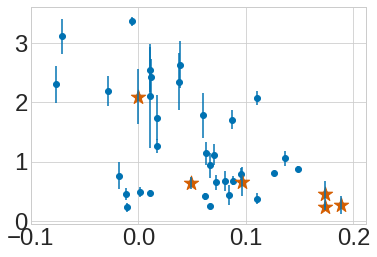

In [175]:
x = luc_all_metrics['R_seg_xist18_6']
y = luc_all_metrics['Luciferase']
plt.scatter(x, y)
plt.scatter(luc_syn['R_seg_xist18_6'],
            luc_syn['Luciferase'],
            color=colors[2],
            marker='*',
            s=225)
plt.errorbar(x, y, yerr=luc_all_metrics['std'], linestyle='None')
#plt.savefig('/home/jessime/Research/pics/paper/tetris_corr_6mers.pdf', bbox_inches='tig
plt.show()

this graph isn't anything more than checking to make sure I have the correct data.

In [177]:
name_map = '/home/jessime/Research/tetris/luc3_name_map.xlsx'
name_map = pd.read_excel(name_map, index_col=0)
name_map.head()

Paper ID
Sample                                         
1700047N06Rik                     1700047N06rik
1810010K12Rik                     1810010K12Rik
409/7(1.8-5.5k)            Xist-5.5kb-minus-2kb
433/434 (repeat A delete)    Xist-delta-RepeatA
435/436 (repeat A only)       Xist-RepeatA-only

In [179]:
print(luc_all_metrics.shape)
luc_all_metrics = luc_all_metrics.join(name_map)
print(luc_all_metrics.shape)
luc_all_metrics.head()

(39, 28)
(39, 29)


Luciferase  R_whole_xist18_4  R_seg_xist18_4    nhmmer  \
Sample                                                                  
1700047N06Rik    3.107935         -0.266998       -0.266998  0.000000   
1810010K12Rik    2.072199          0.327735        0.327735  0.000000   
4930579O11Rik    2.183471         -0.070534       -0.070534  0.000000   
5730488B01Rik    1.137146          0.242914        0.265506  0.000000   
Air1             3.356199         -0.024776        0.029676  0.002519   

               Stretcher  R_whole_xist18_6  R_seg_xist18_6  R_whole_xist16_4  \
Sample                                                                         
1700047N06Rik   0.333663         -0.070944       -0.070944         -0.237390   
1810010K12Rik   0.404455          0.109939        0.109939          0.346883   
4930579O11Rik   0.397132         -0.028118       -0.028118         -0.116507   
5730488B01Rik   0.433347          0.053491        0.063069          0.234296   
Air1            0.325281         -0.031900       -0.005879         -0.035998   

               R_seg_xist16_4  R_whole_xist16_6      ...        \
Sample                                               ...         
1700047N06Rik       -0.237390         -0.060436      ...         
1810010K12Rik        0.346883          0.102176      ...         
4930579O11Rik       -0.116507         -0.051992      ...         
5730488B01Rik        0.258423          0.051746      ...         
Air1                 0.095731         -0.027287      ...         

               R_seg_xist18_1  R_whole_xist18_1  R_seg_xist18_2  \
Sample                                                            
1700047N06Rik       -0.480804         -0.480804       -0.201591   
1810010K12Rik        0.397996          0.397996        0.419711   
4930579O11Rik       -0.234032         -0.234032       -0.037956   
5730488B01Rik        0.151595          0.113213        0.223790   
Air1                 0.901947          0.402044        0.406807   

               R_whole_xist18_2  R_seg_xist18_3  R_whole_xist18_3  \
Sample                                                              
1700047N06Rik         -0.201591       -0.334069         -0.334069   
1810010K12Rik          0.419711        0.391061          0.391061   
4930579O11Rik         -0.037956       -0.085065         -0.085065   
5730488B01Rik          0.179038        0.302333          0.270653   
Air1                   0.171157        0.135311          0.022632   

               R_seg_xist18_5  R_whole_xist18_5       std       Paper ID  
Sample                                                                    
1700047N06Rik       -0.146894         -0.146894  0.296776  1700047N06rik  
1810010K12Rik        0.208215          0.208215  0.115907  1810010K12Rik  
4930579O11Rik       -0.049991         -0.049991  0.247484   493057O11Rik  
5730488B01Rik        0.154932          0.140019  0.199180  5730488B01Rik  
Air1                 0.022703         -0.039211  0.079848         Airn_1  

[5 rows x 29 columns]

In [181]:
merge_mess_df = pd.merge(s11, luc_all_metrics, 
                         left_on='ID', 
                         right_on='Paper ID')
print(merge_mess_df.shape)
merge_mess_df.head()

(39, 43)


ID                                    cloned fragment spliced  \
0  1700047N06rik  AACAGTGGTGCCTTCCTCTGGGACCAGCTTTCCCAAGCTGGAAATA...       n   
1  1700086L19Rik  GTTCTGAGCCGGAGCGAGAGGCGCTTCAGAGAAGGAGGGACCGACC...       y   
2  1810010K12Rik  CCTGCTCCATTTCAACCATTGTGTGCTTTGGGAGAATAATTAAGTT...       n   
3   493057O11Rik  CTCCTAAGAATCTAAGCAAAATAGAGTTGGAACAGGTAAATAACAT...       n   
4  5730488B01Rik  TAGGGACCCTGACTTCGTTGATTCTTTAAATCCCCTCTCCTCGATC...       n   

  mm10_chr  mm10_start    mm10_end strand  rel. luc.     SEEKR  nhmmer_x  \
0        1  10056969.0  10057963.0      -   3.107935 -0.070944       0.0   
1       12  74284276.0  74295938.0      +   0.456968 -0.011457       0.0   
2        2  19451806.0  19453154.0      +   2.072199  0.109939       0.0   
3        8  81665775.0  81667100.0      -   2.183471 -0.028118       0.0   
4        4  44702820.0  44705230.0      +   1.137146  0.053491       0.0   

       ...        R_seg_xist18_1  R_whole_xist18_1  R_seg_xist18_2  \
0      ...             -0.480804         -0.480804       -0.201591   
1      ...             -0.859354         -0.859354       -0.439783   
2      ...              0.397996          0.397996        0.419711   
3      ...             -0.234032         -0.234032       -0.037956   
4      ...              0.151595          0.113213        0.223790   

   R_whole_xist18_2  R_seg_xist18_3  R_whole_xist18_3  R_seg_xist18_5  \
0         -0.201591       -0.334069         -0.334069       -0.146894   
1         -0.439783       -0.060431         -0.060431       -0.012132   
2          0.419711        0.391061          0.391061        0.208215   
3         -0.037956       -0.085065         -0.085065       -0.049991   
4          0.179038        0.302333          0.270653        0.154932   

   R_whole_xist18_5       std       Paper ID  
0         -0.146894  0.296776  1700047N06rik  
1         -0.012132  0.096542  1700086L19Rik  
2          0.208215  0.115907  1810010K12Rik  
3         -0.049991  0.247484   493057O11Rik  
4          0.140019  0.199180  5730488B01Rik  

[5 rows x 43 columns]

In [183]:
luc_syn2 = merge_mess_df[merge_mess_df['ID'].str.contains('Synthetic')]

(0.052216875297047188, 0.75223014665582388)


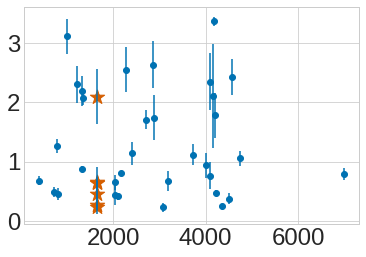

In [186]:
x = merge_mess_df['Length']
y = merge_mess_df['Luciferase']
plt.scatter(x, y)
plt.scatter(luc_syn2['Length'],
            luc_syn2['Luciferase'],
            color=colors[2],
            marker='*',
            s=225)
plt.errorbar(x, y, yerr=merge_mess_df['std'], linestyle='None')
print(pearsonr(x, y))
outfile = '/home/jessime/Research/pics/paper/tetris_corr_length.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()

Note that the R value here is slightly better than the .03. It doesn't matter, but we should try to be consistant. The only difference is that I'm not using the lncRNAs in the "to_drop" list. 

Might as well save what I have, since it isn't that big.

In [187]:
outfile = '/home/jessime/Research/tetris/luc3_s11.xlsx'
merge_mess_df.to_excel(outfile)

### No length normalization

This is going to be pretty similar, but we got a comment that asks why we length normalize. In response, we're going to show how much predictive power we get in the tetris assay if we don't.

I don't want to rewrite any of my kmer_counts code. I think I can avoid this by multiplying the counts we have by the lengths we've calculated, then uses those values for the similarity matrix. Should be good stuff.

In [241]:
%aimport fasta

In [257]:
%aimport kmer_counts

In [239]:
infile = '/home/jessime/Research/tetris/luc3_s11.xlsx'
merge_mess_df = pd.read_excel(infile, index_col=0)

In [242]:
xist = '/home/jessime/Research/indv_seqs/M5_xist_1800frag.fa'
xist = fasta.Maker(xist)

In [248]:
mat = np.random.randint(0, 9, (3,4))
len_test = np.random.randint(0, 9, 3)

print(mat)
print(len_test)
(mat.T * len_test).T

[[7 3 7 8]
 [7 2 5 7]
 [6 4 6 1]]
[4 3 7]


array([[28, 12, 28, 32],
       [21,  6, 15, 21],
       [42, 28, 42,  7]])

A Jupyter Widget


(40, 40)
(-0.48093980621670507, 0.0019400427669497356)


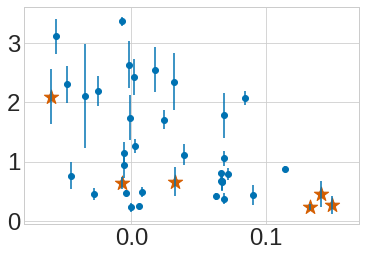

In [263]:
mean = '/home/jessime/Code/old_kmers/data/M5_transcripts01_mean6.npy'
std = '/home/jessime/Code/old_kmers/data/M5_transcripts01_std6.npy'

#counter = kmer_counts.BasicCounter(mean=mean, std=std)
counter = kmer_counts.BasicCounter(mean=mean, std=std, length=False)
counter.seqs = merge_mess_df['cloned fragment'].str.upper().tolist() + xist.seqs
counter.get_counts()
sim = np.corrcoef(counter.counts)
print(sim.shape)

merge_mess_df['Xist_len_norm'] = sim[-1, :-1]

luc_syn2 = merge_mess_df[merge_mess_df['ID'].str.contains('Synthetic')]


x = merge_mess_df['Xist_len_norm']
y = merge_mess_df['Luciferase']
plt.scatter(x, y)
plt.scatter(luc_syn2['Xist_len_norm'],
            luc_syn2['Luciferase'],
            color=colors[2],
            marker='*',
            s=225)
plt.errorbar(x, y, yerr=merge_mess_df['std'], linestyle='None')
print(pearsonr(x, y))
#outfile = '/home/jessime/Research/pics/paper/tetris_corr_length.pdf'
#plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()

In [253]:
pearsonr(np.arange(10) * 2, np.arange(10) * 5) #(-0.48788958952508038, 0.0016289295304599204)

(1.0, 0.0)

Hahahaha, pearson row normalizes. I guess I could force not normalization with my pearson script.

In [262]:
%aimport pearson

A Jupyter Widget


(40, 40)
(-0.11470170185762034, 0.48686325145349829)


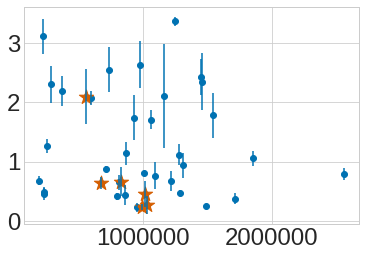

In [265]:
counter = kmer_counts.BasicCounter(mean=mean, std=std, length=False)
counter.seqs = merge_mess_df['cloned fragment'].str.upper().tolist() + xist.seqs
counter.get_counts()
sim = pearson.pearson(counter.counts, counter.counts, row_standardize=False)
print(sim.shape)

merge_mess_df['Xist_len_norm'] = sim[-1, :-1]

luc_syn2 = merge_mess_df[merge_mess_df['ID'].str.contains('Synthetic')]


x = merge_mess_df['Xist_len_norm']
y = merge_mess_df['Luciferase']
plt.scatter(x, y)
plt.scatter(luc_syn2['Xist_len_norm'],
            luc_syn2['Luciferase'],
            color=colors[2],
            marker='*',
            s=225)
plt.errorbar(x, y, yerr=merge_mess_df['std'], linestyle='None')
print(pearsonr(x, y))
#outfile = '/home/jessime/Research/pics/paper/tetris_corr_length.pdf'
#plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()

### HOTTIP-likeness

We're going to do the same analysis that we did with Xist, but use Hottip to see if we can find a positive correlation.

In [216]:
hottip = merge_mess_df.loc[17]['cloned fragment'].upper()
hottip

'GTAAAACTCAACAGTGACAAAGAGACGAAGTACGGTTCCAGGCTCCAATTCTCGGAGACTCTCGGAGACTCGAGGGCAGTTTACATACAGGTCAGACACGCTGGAGGCCAAGGTCAAGTTGAAAGTTGCTGTCTAGTCAGCGTGAGAAACTACAATGAAAGCCCAGAGACAGAGCCGACTGCCCACCTCCCCTCGCTCTCAATTCCCCCATCCTTTGCTATCTGGCTTCTGGCTCTGTTTGGTTTCTCAGCATCTTTTTTTTTTCCCTCTCTCTTTGTAGAGTTTTGGGGGCGGTGTTTACAGGCTGGACTGGTTCTTTTCTGTCGGCCGCCCTGCTCTTAGCTGGGTTTCTGAACCTCCGAAGTTTTCCAGCTAGGTTCGGAAAAAACGAAAACACAGCTCAGGAAGGCTCCACCAGCCGATGCCTATGCCAGTTCACCTCTGGCAGTGGCTGTACTGCTGGTCCACACAGCAGCCAAGACCAGCTCCACGTTCTTTCCTCCCCCTCAGTTCACTGGAGCCGGGAGCCCTGCACTCAGGGGAAGGGCCTCAGCTCTACAGACTGCCAAAGTCGGCTGGGTCCCTCCGGCTCCAAAAATGGTGAGAAAGGAACTCATCTTTTTCCACAGAGGAATCAGAAGCAGGTACAACGGGACCAGCCTGGAGCCAGCCATCGGGAAGAGATAGTAAAGAGAACTCCAACTGCATCACCCTCTATTTCTTACCGAGTCTCAAAGAAGGGAGAAGGCACCTCCGCCCGCACCCCTCCCCCGTTTTAGAAGCACTAGCAGCAGGTTTCAGGCTCTGGGGAGCAGCACCCCCTACCCCGCTGCCTGAGATCCCTTCAACCGAGTGATTTAGATGGTGCCGAGAGCTCTCTCCGTGTTCTAATGGCGTCATTGCGCTGTCCTTCACCACATCTGGAAACTGAGACTTCACCTAAAGGACCCTAATATGAGTTGGATGCAGAGGGACCGAATTCCTGTAAATAGAGGCTCA

In [217]:
%aimport kmer_counts

In [218]:
mean = '/home/jessime/Code/old_kmers/data/M5_transcripts01_mean6.npy'
std = '/home/jessime/Code/old_kmers/data/M5_transcripts01_std6.npy'

counter = kmer_counts.BasicCounter(mean=mean, std=std)
counter.seqs = merge_mess_df['cloned fragment'].str.upper().tolist() + [hottip]
counter.get_counts()

A Jupyter Widget

In [219]:
sim = np.corrcoef(counter.counts)
print(sim.shape)
sim

(40, 40)


array([[  1.00000000e+00,  -3.00744603e-02,  -4.74914923e-02, ...,
         -3.82302885e-02,  -3.57515287e-02,  -6.31639202e-04],
       [ -3.00744603e-02,   1.00000000e+00,   1.99117374e-02, ...,
         -1.57529691e-02,   2.44657477e-02,   1.77556897e-02],
       [ -4.74914923e-02,   1.99117374e-02,   1.00000000e+00, ...,
          5.07877721e-02,   4.45519050e-02,   5.19518230e-02],
       ..., 
       [ -3.82302885e-02,  -1.57529691e-02,   5.07877721e-02, ...,
          1.00000000e+00,   2.00463770e-01,   1.57715506e-02],
       [ -3.57515287e-02,   2.44657477e-02,   4.45519050e-02, ...,
          2.00463770e-01,   1.00000000e+00,   1.53748824e-02],
       [ -6.31639202e-04,   1.77556897e-02,   5.19518230e-02, ...,
          1.57715506e-02,   1.53748824e-02,   1.00000000e+00]])

In [220]:
merge_mess_df['Hottip'] = sim[-1, :-1]

In [228]:
pd.Series(sim[-1, :-1]).sort_values().tail()

30    0.053224
29    0.055084
36    0.055197
4     0.096509
17    1.000000
dtype: float64

Well shoot. Hottip is much more unique than I was expecting.

(-0.037168288175316512, 0.82466939607704681)


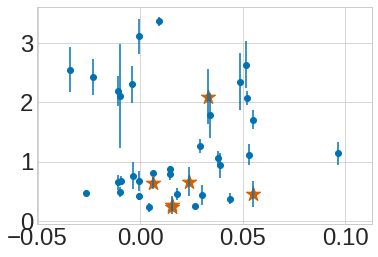

In [231]:
luc_syn2 = merge_mess_df[merge_mess_df['ID'].str.contains('Synthetic')]


x = merge_mess_df.drop(17)['Hottip']
y = merge_mess_df.drop(17)['Luciferase']
plt.scatter(x, y)
plt.scatter(luc_syn2['Hottip'],
            luc_syn2['Luciferase'],
            color=colors[2],
            marker='*',
            s=225)
plt.errorbar(x, y, yerr=merge_mess_df.drop(17)['std'], linestyle='None')
print(pearsonr(x, y))
#outfile = '/home/jessime/Research/pics/paper/tetris_corr_length.pdf'
#plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()

Yea... That didn't work out so well.

I don't think this will work either, but let's try something that activated a little.

A Jupyter Widget


(0.20183458850569991, 0.22429613669150794)


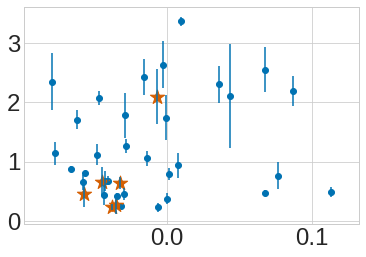

In [236]:
rna_1700047N06rik = merge_mess_df.loc[0]['cloned fragment'].upper()

counter = kmer_counts.BasicCounter(mean=mean, std=std)
counter.seqs = merge_mess_df['cloned fragment'].str.upper().tolist() + [rna_1700047N06rik]
counter.get_counts()
sim = np.corrcoef(counter.counts)

merge_mess_df['1700047N06rik'] = sim[-1, :-1]

luc_syn2 = merge_mess_df[merge_mess_df['ID'].str.contains('Synthetic')]


x = merge_mess_df.drop(0)['1700047N06rik']
y = merge_mess_df.drop(0)['Luciferase']
plt.scatter(x, y)
plt.scatter(luc_syn2['1700047N06rik'],
            luc_syn2['Luciferase'],
            color=colors[2],
            marker='*',
            s=225)
plt.errorbar(x, y, yerr=merge_mess_df.drop(0)['std'], linestyle='None')
print(pearsonr(x, y))
#outfile = '/home/jessime/Research/pics/paper/tetris_corr_length.pdf'
#plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()

Still not great. Let's do the Air fragment too, before abandoning this.

A Jupyter Widget


(-0.052508938297401352, 0.75421220395357247)


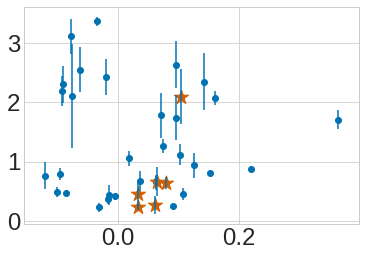

In [238]:
air = merge_mess_df.loc[4]['cloned fragment'].upper()

counter = kmer_counts.BasicCounter(mean=mean, std=std)
counter.seqs = merge_mess_df['cloned fragment'].str.upper().tolist() + [air]
counter.get_counts()
sim = np.corrcoef(counter.counts)

merge_mess_df['air'] = sim[-1, :-1]

luc_syn2 = merge_mess_df[merge_mess_df['ID'].str.contains('Synthetic')]


x = merge_mess_df.drop(4)['air']
y = merge_mess_df.drop(4)['Luciferase']
plt.scatter(x, y)
plt.scatter(luc_syn2['air'],
            luc_syn2['Luciferase'],
            color=colors[2],
            marker='*',
            s=225)
plt.errorbar(x, y, yerr=merge_mess_df.drop(4)['std'], linestyle='None')
print(pearsonr(x, y))
#outfile = '/home/jessime/Research/pics/paper/tetris_corr_length.pdf'
#plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()

So, massive failure, overall. I think Mauro has a response for the comment though, so in this particular case, it's okay.

### 1-8 kmers

This is the same thing I've been working on in the past sections. But in this case, I have to alter the kmer size.

In [266]:
%aimport fasta

In [267]:
%aimport kmer_counts

In [268]:
!mkdir /home/jessime/Research/pics/paper/tetris_k/

In [275]:
def plot_tetris_k(k):
    infile = '/home/jessime/Research/tetris/luc3_s11.xlsx'
    xist = '/home/jessime/Research/indv_seqs/M5_xist_1800frag.fa'
    mean = f'/home/jessime/Code/old_kmers/data/M5_transcripts01_mean{k}.npy'
    std = f'/home/jessime/Code/old_kmers/data/M5_transcripts01_std{k}.npy'
    outbase = '/home/jessime/Research/pics/paper/tetris_k/'
    
    merge_mess_df = pd.read_excel(infile, index_col=0)
    xist = fasta.Maker(xist)
    counter = kmer_counts.BasicCounter(mean=mean, std=std, k=k)
    counter.seqs = merge_mess_df['cloned fragment'].str.upper().tolist() + xist.seqs
    counter.get_counts()
    sim = np.corrcoef(counter.counts)
    merge_mess_df[f'{k}'] = sim[-1, :-1]
    
    luc_syn2 = merge_mess_df[merge_mess_df['ID'].str.contains('Synthetic')]

    x = merge_mess_df[f'{k}']
    y = merge_mess_df['Luciferase']
    plt.scatter(x, y)
    plt.scatter(luc_syn2[f'{k}'],
                luc_syn2['Luciferase'],
                color=colors[2],
                marker='*',
                s=225)
    plt.errorbar(x, y, yerr=merge_mess_df['std'], linestyle='None')
    outfile = outbase + f'{k}.pdf'
    plt.savefig(outfile, bbox_inches='tight', dpi=600)
    plt.clf()
    return pearsonr(x, y)

In [276]:
r_p_vals = [plot_tetris_k(k) for k in range(1, 9)]

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

In [279]:
list(zip(range(1, 9), r_p_vals))

[(1, (-0.41731283106045369, 0.0082142103470754426)),
 (2, (-0.44022680487402316, 0.0050383886353159114)),
 (3, (-0.45705232702775367, 0.0034438171007317268)),
 (4, (-0.45477619397918839, 0.0036297649811262689)),
 (5, (-0.46545283490976003, 0.0028275125211906223)),
 (6, (-0.48788958952508049, 0.0016289295304599157)),
 (7, (-0.44599698343676258, 0.0044314140741710632)),
 (8, (-0.32794969302225357, 0.041533487508321365))]

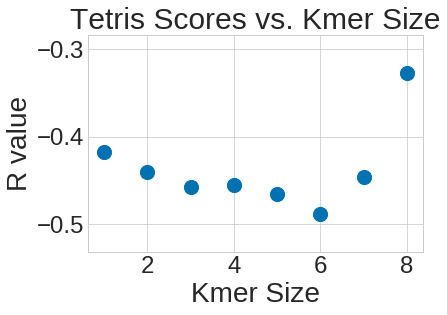

In [288]:
plt.scatter(list(range(1,9)), [x[0] for x in r_p_vals], s=200)
plt.xlabel('Kmer Size')
plt.ylabel('R value')
plt.title('Tetris Scores vs. Kmer Size')

outfile = '/home/jessime/Research/pics/paper/tetris_k/r_vals.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)

## Fig 3

The items on the to-do list here are significantly more complicated than they were for fig4. One of the simplist is:

> Divide lncRNAs by their nuclear ratio first, and then checking for kmer enrichments

In [293]:
local_df = pd.read_csv('/home/jessime/Research/fig_data/local_df.csv', index_col=0)
print(local_df.shape)
local_df.head()

(24454, 4)


Group  % Nuclear Cell Type   Method
CTD-2231E14.8-001      1   0.224587      K562  PolyA -
RP11-67K19.3-001       0   1.000000      K562  PolyA -
RP4-676J13.2-001       0   1.000000      K562  PolyA -
RP11-348J12.5-001      2   0.696120      K562  PolyA -
RP11-178L8.3-001       4   0.591600      K562  PolyA -

In [295]:
cyto = local_df[local_df['% Nuclear'] < .5]
cyto.shape

(4777, 4)

In [301]:
nuc = local_df[local_df['% Nuclear'] > .95]
nuc.shape

(7899, 4)

In [302]:
v22_6mers = '/home/jessime/Research/treeview/6mers01_v22_std3.csv'
v22_6mers = pd.read_csv(v22_6mers, index_col=0)
print(v22_6mers.shape)
v22_6mers.head()

(15962, 4096)


AAAAAA    AAAAAG    AAAAAT    AAAAAC    AAAAGA    AAAAGG  \
RP11-34P13.3-001 -0.425701 -0.606175 -0.671423 -0.531542 -0.610098 -0.528997   
FAM138A-001      -0.425701 -0.606175 -0.671423 -0.531542 -0.610098  0.374723   
RP11-34P13.7-001  0.011820 -0.293345  0.336824  0.213412  0.513435 -0.528997   
RP11-34P13.7-201  0.904654 -0.606175  0.286621  0.884179 -0.610098 -0.528997   
RP11-34P13.8-001 -0.243395 -0.606175  0.904011  0.244475 -0.024907 -0.528997   

                    AAAAGT    AAAAGC    AAAATA    AAAATG    ...       CCCCGT  \
RP11-34P13.3-001 -0.503878 -0.510077 -0.653643 -0.632096    ...    -0.226408   
FAM138A-001      -0.503878 -0.510077 -0.653643  0.091355    ...    -0.226408   
RP11-34P13.7-001 -0.101329 -0.510077 -0.392529  1.555371    ...    -0.226408   
RP11-34P13.7-201 -0.503878 -0.510077  0.338809  1.743387    ...    -0.226408   
RP11-34P13.8-001 -0.503878 -0.510077 -0.653643  1.972111    ...    -0.226408   

                    CCCCGC    CCCCTA    CCCCTG    CCCCTT    CCCCTC    CCCCCA  \
RP11-34P13.3-001 -0.311190  2.550218  1.168998  3.600297  1.137802  1.133095   
FAM138A-001      -0.311190 -0.303475  0.508588 -0.421082  1.455965 -0.463159   
RP11-34P13.7-001  0.206063 -0.303475 -0.481332  0.099883 -0.455696  0.364012   
RP11-34P13.7-201 -0.311190  2.506801  1.143889 -0.421082 -0.455696  1.108809   
RP11-34P13.8-001 -0.311190 -0.303475 -0.481332 -0.421082 -0.455696 -0.463159   

                    CCCCCG    CCCCCT    CCCCCC  
RP11-34P13.3-001 -0.260158  1.666619  1.639084  
FAM138A-001       1.244443 -0.392508 -0.251449  
RP11-34P13.7-001 -0.260158  0.141006  0.238383  
RP11-34P13.7-201 -0.260158 -0.392508  1.610320  
RP11-34P13.8-001 -0.260158 -0.392508 -0.251449  

[5 rows x 4096 columns]

In [303]:
cyto_set = set(cyto.index.values)
nuc_set = set(nuc.index.values)

print(len(cyto_set))
print(len(nuc_set))

2801
4573


In [304]:
cyto_counts = v22_6mers[v22_6mers.index.isin(cyto_set)]
nuc_counts = v22_6mers[v22_6mers.index.isin(nuc_set)]
print(cyto_counts.shape)
print(nuc_counts.shape)

(2805, 4096)
(4576, 4096)


Stupid duplicates.

In [313]:
local_counts_df = pd.DataFrame()
local_counts_df['cyto'] = cyto_counts.mean(axis=0)
local_counts_df['nuc'] = nuc_counts.mean(axis=0)
local_counts_df['nuc - cyto'] = local_counts_df['nuc'] - local_counts_df['cyto']
local_counts_df = local_counts_df.sort_values('nuc - cyto')
print(local_counts_df.shape)
local_counts_df.tail(10)

(4096, 3)


cyto       nuc  nuc - cyto
TTATTT  0.006454  0.163646    0.157192
AATATA -0.039028  0.119286    0.158315
TATAAT -0.035995  0.122895    0.158890
TATTTA -0.015515  0.149161    0.164676
ATATTT -0.024489  0.141028    0.165516
AAATAT -0.059573  0.106955    0.166528
AATATT -0.049729  0.119394    0.169123
ATTTAT -0.035582  0.136158    0.171741
TTTATA -0.029061  0.144194    0.173255
TAATAT -0.042387  0.137741    0.180128

In [314]:
local_counts_df.head(10)

cyto       nuc  nuc - cyto
CGGCGC  0.285015 -0.016678   -0.301693
GCGGCG  0.272058 -0.016718   -0.288776
CCCGGC  0.324456  0.037662   -0.286794
CGCCCG  0.317564  0.034745   -0.282819
CGCCGC  0.264372 -0.012241   -0.276612
GGCGCG  0.298941  0.023111   -0.275830
GCCCGC  0.292618  0.020273   -0.272345
CGGCCG  0.279352  0.007978   -0.271374
GGCCGC  0.283500  0.012704   -0.270796
GCCGCC  0.269374  0.001213   -0.268161

Whew, I was worried about those numbers for a bit. But it's actually really great. The kmers show exactly what I would have expected. And the explanation for the numbers is just that each indiviual kmer is only contributing a little bit to the overall difference.

In [315]:
!mkdir /home/jessime/Research/localization

In [316]:
outfile = '/home/jessime/Research/localization/local_count_means.csv'
local_counts_df.to_csv(outfile)

Mauro pointed out that I need to do some statistics on these kmers. I'm going to add another column showing the results of a ks test between the two distributions. I might add two more if I also adjust for multiple testing.

In [326]:
cyto_counts.columns.get_loc('CGGCGC')

3447

In [327]:
ks_2samp(cyto_counts.iloc[:, 3447], nuc_counts.iloc[:, 3447])

Ks_2sampResult(statistic=0.092763608940079512, pvalue=1.6848683098367989e-13)

In [328]:
def hard_code_ks(k):
    return ks_2samp(cyto_counts[k], nuc_counts[k])[1]

In [332]:
local_counts_df['p-value'] = [hard_code_ks(k) for k in local_counts_df.index.values]
local_counts_df['adjusted p-value'] = local_counts_df['p-value'] * 4096

local_counts_df.head(10)

cyto       nuc  nuc - cyto       p-value  adjusted p-value
CGGCGC  0.285015 -0.016678   -0.301693  1.684868e-13      6.901221e-10
GCGGCG  0.272058 -0.016718   -0.288776  3.536016e-18      1.448352e-14
CCCGGC  0.324456  0.037662   -0.286794  3.945137e-22      1.615928e-18
CGCCCG  0.317564  0.034745   -0.282819  3.454908e-14      1.415130e-10
CGCCGC  0.264372 -0.012241   -0.276612  4.613089e-17      1.889521e-13
GGCGCG  0.298941  0.023111   -0.275830  8.180562e-16      3.350758e-12
GCCCGC  0.292618  0.020273   -0.272345  1.482574e-18      6.072623e-15
CGGCCG  0.279352  0.007978   -0.271374  3.069323e-15      1.257195e-11
GGCCGC  0.283500  0.012704   -0.270796  1.208140e-19      4.948540e-16
GCCGCC  0.269374  0.001213   -0.268161  1.629885e-22      6.676010e-19

In [333]:
outfile = '/home/jessime/Research/localization/local_count_means.csv'
local_counts_df.to_csv(outfile)

In [335]:
(local_counts_df['adjusted p-value'] < .05).sum()

387

### Proteins with kmers

This is going to be my first challenge in terms of even getting things up and running:

> Swap out the community columns for the kmers, and rerun everything.

I've pulled out the original matrix files from January 2017. It looks like most of the code I need can be pulled from there too. I'm going to do it the same way I did before: HepG2 first, then repeat everything for K562 cells.

In [336]:
HepG2_X_y_df = '/home/jessime/Research/proteins/HepG2_p0.13_X_y_df.csv'
HepG2_X_y_df = pd.read_csv(HepG2_X_y_df, index_col=0)
HepG2_X_y_df.shape

(3746, 79)

In [345]:
X_df = v22_6mers.loc[HepG2_X_y_df.index]
X_df = X_df[~X_df.index.duplicated(keep='first')]
X_df = X_df.join(HepG2_X_y_df.iloc[:, 6:9])

y_df = HepG2_X_y_df.iloc[:, 9:]

In [347]:
(X_df.index == y_df.index).all()

True

In [348]:
def loo_predictions_loop(X_df, y_df, class_weight=None):
    X = X_df.values
    
    loo = LeaveOneOut()
    predictions = pd.DataFrame(data=np.zeros(y_df.shape), 
                               columns=y_df.columns,
                               index=y_df.index)
    
    for protein in tqdm_notebook(y_df.columns):
        predict_ls = []
        y = y_df[protein].values
        for train_index, test_index in tqdm_notebook(loo.split(X), leave=False):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            clf = LogisticRegression(class_weight=class_weight)
            clf.fit(X_train, y_train)
            results = clf.predict(X_test)[0]
            predict_ls.append(results)
        predictions[protein] = predict_ls
        
    return predictions

As is, this is going to take several months to run. I've got to get a parallel version up and going. This should be pretty fun since I haven't gotten to use the mp lib in 3.6 yet. I've got nested for loops that are pretty much totally independent (from each other and between loops), except that they're dumping results into the same 2D matrix. I'm going to write some toy examples here just to show that I can get everything up and running in the way that I need. Then I'll move on to modifying the code that I have.

In [387]:
CONST = .5

def half(i):
    sleep(.05)
    return int(i * CONST)

mat = np.reshape(np.arange(100), (10, 10))
mat

new_mat = np.zeros((10, 10))

for i, row in enumerate(mat):
    for j, element in enumerate(row):
        new_mat[i, j] = half(element)   
new_mat

array([[  0.,   0.,   1.,   1.,   2.,   2.,   3.,   3.,   4.,   4.],
       [  5.,   5.,   6.,   6.,   7.,   7.,   8.,   8.,   9.,   9.],
       [ 10.,  10.,  11.,  11.,  12.,  12.,  13.,  13.,  14.,  14.],
       [ 15.,  15.,  16.,  16.,  17.,  17.,  18.,  18.,  19.,  19.],
       [ 20.,  20.,  21.,  21.,  22.,  22.,  23.,  23.,  24.,  24.],
       [ 25.,  25.,  26.,  26.,  27.,  27.,  28.,  28.,  29.,  29.],
       [ 30.,  30.,  31.,  31.,  32.,  32.,  33.,  33.,  34.,  34.],
       [ 35.,  35.,  36.,  36.,  37.,  37.,  38.,  38.,  39.,  39.],
       [ 40.,  40.,  41.,  41.,  42.,  42.,  43.,  43.,  44.,  44.],
       [ 45.,  45.,  46.,  46.,  47.,  47.,  48.,  48.,  49.,  49.]])

In [388]:
def sync_run(mat):
    new_mat = np.zeros((10, 10))

    for i, row in enumerate(mat):
        for j, element in enumerate(row):
            new_mat[i, j] = half(element)   
    return new_mat

In [389]:
%timeit sync_run(mat)

5.03 s ± 2.75 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Cool. Now let's see if I can get this same array using multiprocessing.

In [390]:
def para_half(row):
    with Pool(2) as pool:
        result = pool.map(half, row)
    return result
    
def para_half(mat):
    with Pool(2) as pool:
        result = pool.map(para_half, mat)
    return result
para_half(mat)

AssertionError: daemonic processes are not allowed to have children

Huh. That's an error worth keeping around.

Basically, I can't nest my multiprocessing calls. That's okay, I guess. I don't need to run this a lot. And getting up to 70 cores or whatever should get the run to be less than a day. 

Let's see what that code looks like:

In [391]:
def protein_prediction(protein):
    predict_ls = []
    y = y_df[protein].values
    for train_index, test_index in tqdm_notebook(loo.split(X), leave=False):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = LogisticRegression(class_weight=class_weight)
        clf.fit(X_train, y_train)
        results = clf.predict(X_test)[0]
        predict_ls.append(results)
    predictions[protein] = predict_ls
    
def para_loo_loop(X_df, y_df, class_weight=None):
    X = X_df.values
    
    loo = LeaveOneOut()
    predictions = pd.DataFrame(data=np.zeros(y_df.shape), 
                               columns=y_df.columns,
                               index=y_df.index)
    
    with Pool() as pool:
        predictions = pool.map(protein_prediction, y_df.columns)

    return predictions

This code isn't exact. I think I would have to have `y_df` be a constant, for example.

But this is a perfect time for me to test out Karl's jupyter script. Hopefully I remember how to do it. It's been a couple weeks already and I haven't had a chance to use it.

In [393]:
mat = np.random.randint(0, 9, (6,3))
mat

array([[3, 0, 8],
       [6, 1, 7],
       [4, 7, 1],
       [1, 4, 2],
       [4, 4, 3],
       [8, 5, 1]])

In [395]:
mat.T

array([[3, 6, 4, 1, 4, 8],
       [0, 1, 7, 4, 4, 5],
       [8, 7, 1, 2, 3, 1]])

In [394]:
np.flipud(mat.T)

array([[8, 7, 1, 2, 3, 1],
       [0, 1, 7, 4, 4, 5],
       [3, 6, 4, 1, 4, 8]])

```bash
sbatch -t 24:00:00 -n 70 --mem=16G --wrap="python kmer_proteins.py"
```

There's a decent chance that this command is going to time out. If it does, I'm going to try submitting one more time with a bit more resources (including time). 

If that doesn't work, then I'm going to have to break this down even farther. It's going to be annoying, but it's possible. Instead of using the pool on the 70 proteins, I can sbatch each of the proteins separately, save their output, then stitch the output back together at the end. Inside of each protein, I can use multiprocessing to get rid of the for loop over the training. I can give each of these processes 20 cores or so (until I run out and things start pending, which is fine). If I do that, once I have things up and running, it should only take a couple of hours.

```python
import argparse

import pandas as pd

from multiprocessing import cpu_count
from multiprocessing import Pool

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import precision_recall_fscore_support


def lncRNA_predict(train_index, test_index):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = LogisticRegression(class_weight=class_weight)
    clf.fit(X_train, y_train)
    result = clf.predict(X_test)[0]
    return result

def make_X_y(protein):
    HepG2_X_y_df = '/proj/calabrlb/users/Jessime/rsync/Research/proteins/eCLIP/2/HepG2_p0.13_X_y_df.csv'
    HepG2_X_y_df = pd.read_csv(HepG2_X_y_df, index_col=0)

    v22_6mers = '/proj/calabrlb/users/Jessime/rsync/Research/treeview/6mers01_v22_std3.csv'
    v22_6mers = pd.read_csv(v22_6mers, index_col=0)

    X_df = v22_6mers.loc[HepG2_X_y_df.index]
    X_df = X_df[~X_df.index.duplicated(keep='first')]
    X_df = X_df.join(HepG2_X_y_df.iloc[:, 6:9])
    
    X = X_df.values
    y = HepG2_X_y_df[protein].values
    
    return X, y
    
def para_loo_loop(protein):
    loo = LeaveOneOut()
    with Pool() as pool:
        predictions = pool.starmap(lncRNA_predict, loo.split(X))
    
    
    predictions = pd.Series(predictions, name=protein)
    outfile = f'/pine/scr/j/e/jessime/protein_LR/{protein}.csv'
    predictions.to_csv(outfile)

if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument('protein', help='Name of protein to predict binding')
    args = parser.parse_args()
    
    X, y = make_X_y(args.protein)
    para_loo_loop(args.protein)
    
```

So that's the core script. 

This second one is the loop I'll write to submit each of these. I can do this from ipython.

```python
from subprocess import Popen

HepG2_X_y_df = '/proj/calabrlb/users/Jessime/rsync/Research/proteins/eCLIP/2/HepG2_p0.13_X_y_df.csv'
HepG2_X_y_df = pd.read_csv(HepG2_X_y_df, index_col=0)
y_df = HepG2_X_y_df.iloc[:, 9:]

with open('LR_subs.sh', 'w') as outfile:
    for protein in y_df.columns:
        cmd = f'sbatch -t 8:00:00 -n 20 --mem=8GB --wrap="python protein_LR.py {protein}"\n'
        outfile.write(cmd)
```

In [22]:
loo = LeaveOneOut()

X = np.random.randint(0, 9, (10, 5))
for test, train in loo.split(X):
    print(train)

[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
